# IS 688 Web Mining - Final Project Submission
*by* **Group 3**
>*New Jersey Institute Of Technology* - **Spring 2020**<br>
>>**Members of Group 3**: 
>>> \- Haisam Ezmat<br> \- Pratik Parija<br> \- Sai Akhilesh Chunduri<br> \- Munazzam Mirza


# Prediction of House Price

Dataset we are using is available on Kraggle and here’s a brief version of what data file looks like:

•	SalePrice — the property’s sale price in dollars. (This is the target variable that we trying to predict)
•	MSSubClass — the building class
•	MSZoning — the general zoning classification
•	LotFrontage — linear feet of street connected to property
•	LotArea — Lot size in square feet
•	Street — Type of road access
•	Alley — Type of alley access
•	LotShape — General shape of property
•	LandContour — Flatness of the property
•	Utilities — Type of utilities available


There are 1460 observations with 79 explanatory variables describing almost every aspect of residential homes in Ames, Iowa. 


Among explanatory variables, there are 37 integer variables, such as Id, MSSubClass, LotFrontage. There are 43 factor variables such as MSZoning, Street, LotShape. Our goal is to predict sale price of each house. For each Id in the test set, we will predict the value of Sale Price variable. 


We will divide our project in 3 sections.

Section 1: Exploratory Data Analysis

Section 2: Feature Engineering

Section 3: Model  Building -  Training and Testing





# Section 1 - Exploratory Data Analysis


In [40]:
library(ggplot2) 
library('ggplot2')
library('ggthemes')
library('scales')
library('dplyr')
library('mice')
library('randomForest')
library('data.table')
library('gridExtra')
library('corrplot')
library('GGally')
library('e1071')
path='C:/Users/Munazzam/Downloads/train.csv'
data=data.frame(read.csv(path))
train <-read.csv('C:/Users/Munazzam/Downloads/train.csv', stringsAsFactors = F)
summary(data)

       Id           MSSubClass       MSZoning     LotFrontage    
 Min.   :   1.0   Min.   : 20.0   C (all):  10   Min.   : 21.00  
 1st Qu.: 365.8   1st Qu.: 20.0   FV     :  65   1st Qu.: 59.00  
 Median : 730.5   Median : 50.0   RH     :  16   Median : 69.00  
 Mean   : 730.5   Mean   : 56.9   RL     :1151   Mean   : 70.05  
 3rd Qu.:1095.2   3rd Qu.: 70.0   RM     : 218   3rd Qu.: 80.00  
 Max.   :1460.0   Max.   :190.0                  Max.   :313.00  
                                                 NA's   :259     
    LotArea        Street      Alley      LotShape  LandContour  Utilities   
 Min.   :  1300   Grvl:   6   Grvl:  50   IR1:484   Bnk:  63    AllPub:1459  
 1st Qu.:  7554   Pave:1454   Pave:  41   IR2: 41   HLS:  50    NoSeWa:   1  
 Median :  9478               NA's:1369   IR3: 10   Low:  36                 
 Mean   : 10517                           Reg:925   Lvl:1311                 
 3rd Qu.: 11602                                                              
 Max

# 1.1 - Plotting SalePrice vs House Style

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


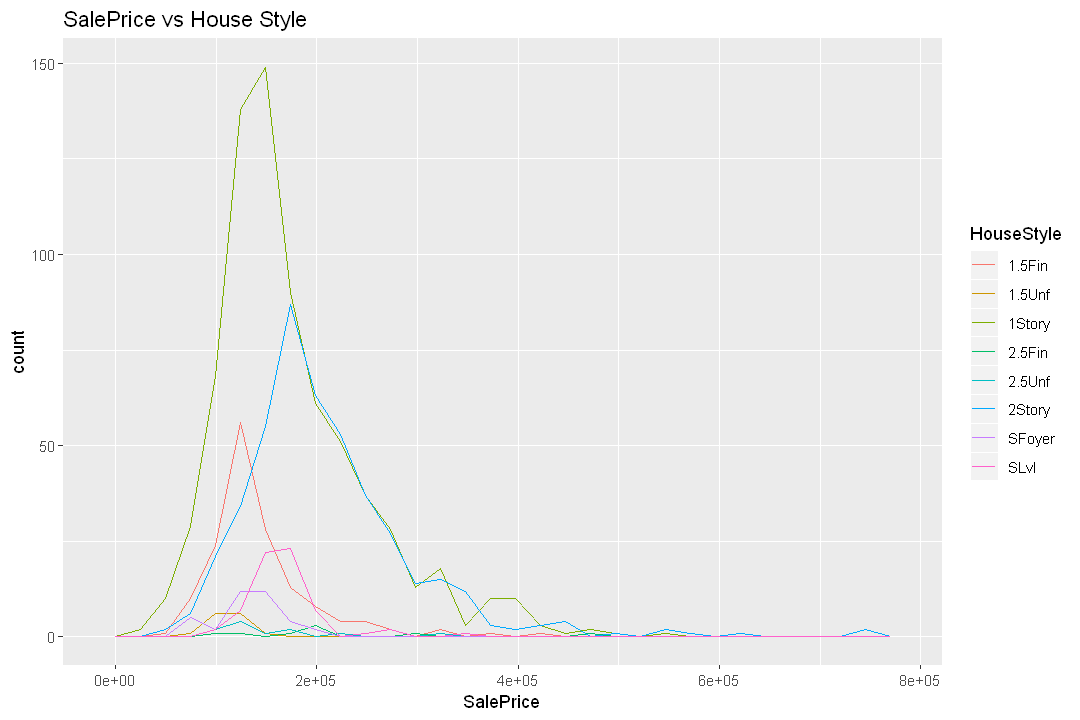

In [21]:
ggplot(data, aes(SalePrice, color=HouseStyle)) + geom_freqpoly() + 
ggtitle("SalePrice vs House Style")

# 1.2 - Plotting SalePrice vs Sale Condition

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


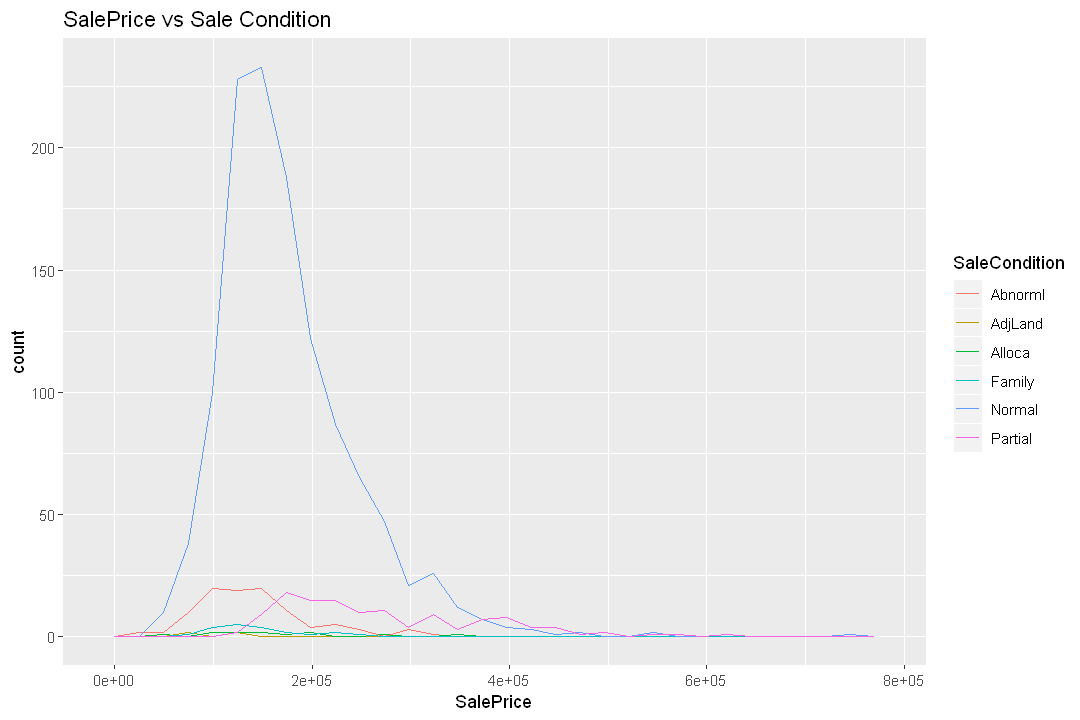

In [22]:
ggplot(data, aes(SalePrice, color=SaleCondition)) + geom_freqpoly() + geom_freqpoly() + ggtitle("SalePrice vs Sale Condition")

# 1.3 - Plotting Histogram for SalePrice vs Sale Condition

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


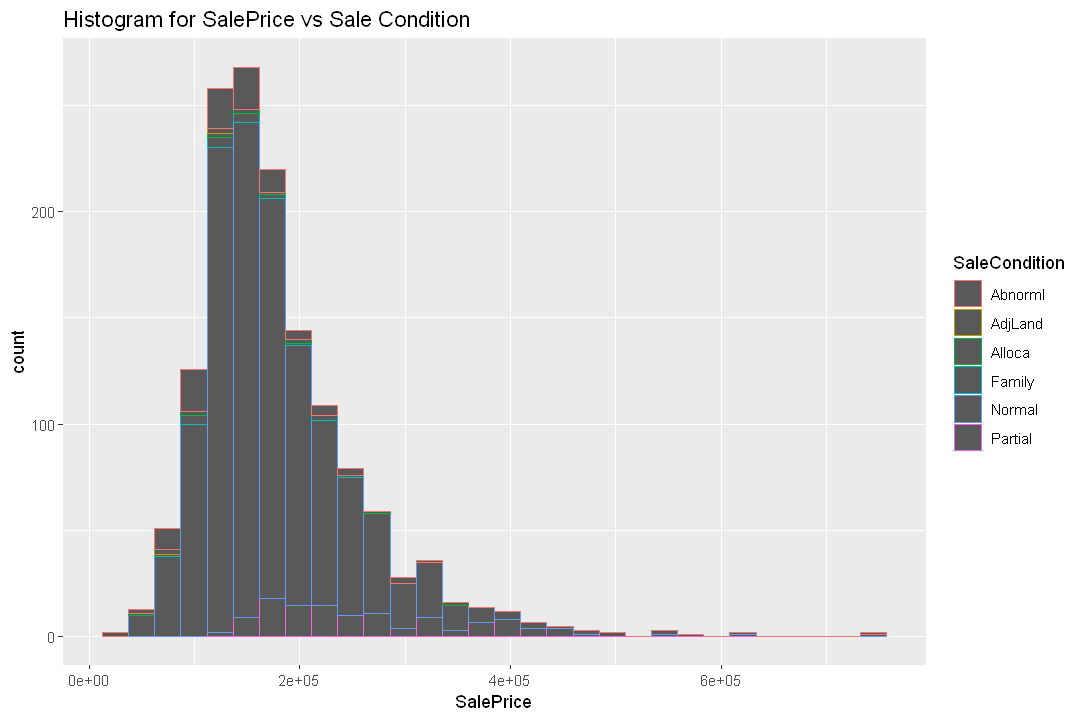

In [23]:
ggplot(data, aes(SalePrice, color=SaleCondition)) +
    geom_histogram() + ggtitle("Histogram for SalePrice vs Sale Condition")

# 1.4 - Plotting Higtogram to figure out the distribution of SalePrice

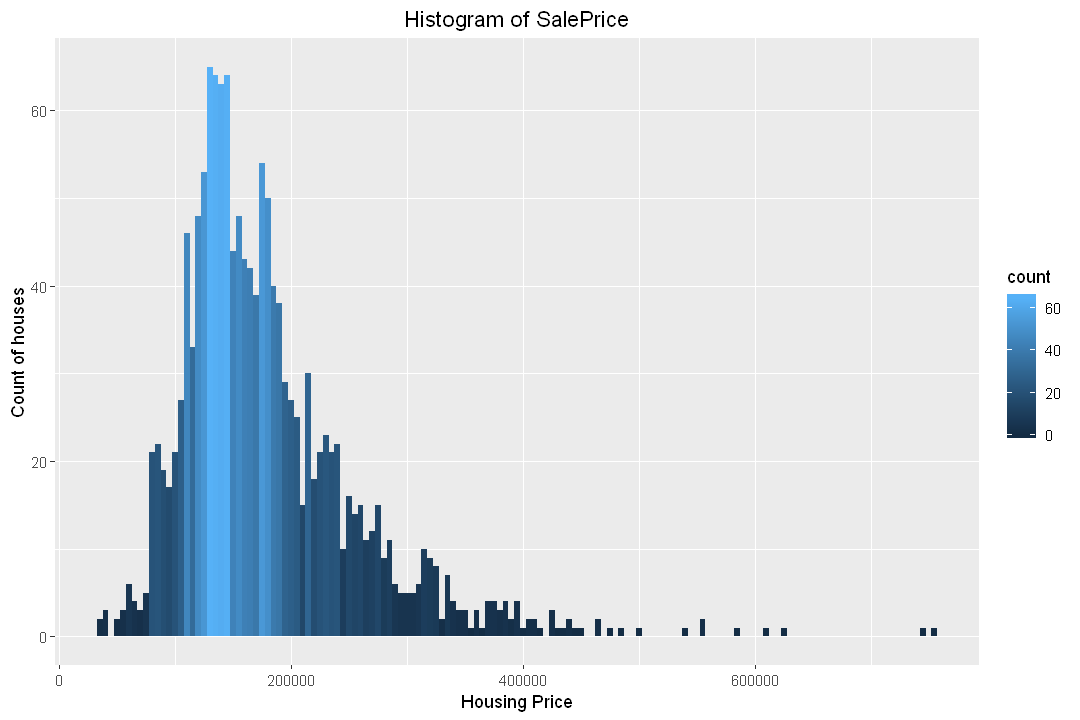

In [24]:
options(scipen=10000)
ggplot(data, aes(x = SalePrice, fill = ..count..)) +
  geom_histogram(binwidth = 5000) +
  ggtitle("Histogram of SalePrice") +
  ylab("Count of houses") +
  xlab("Housing Price") + 
  theme(plot.title = element_text(hjust = 0.5))

Histogram above is skewed to right. Lets do a normal distrubution to fix it. 

In [25]:
#Taking log of SalePrice

data$lSalePrice <- log(data$SalePrice)

# 1.5 - Plotting Higtogram of log SalePrice

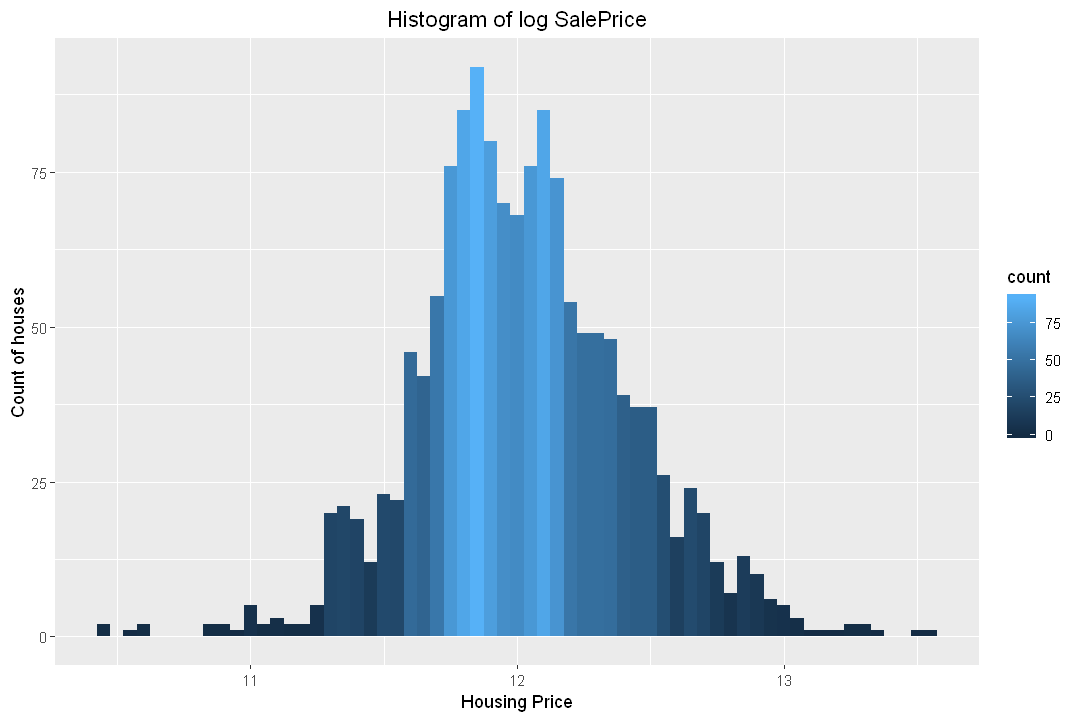

In [26]:
ggplot(data, aes(x = lSalePrice, fill = ..count..)) +
  geom_histogram(binwidth = 0.05) +
  ggtitle("Histogram of log SalePrice") +
  ylab("Count of houses") +
  xlab("Housing Price") + 
  theme(plot.title = element_text(hjust = 0.5))

# 1.6 - Bar Chart Counting houses by MSZoning

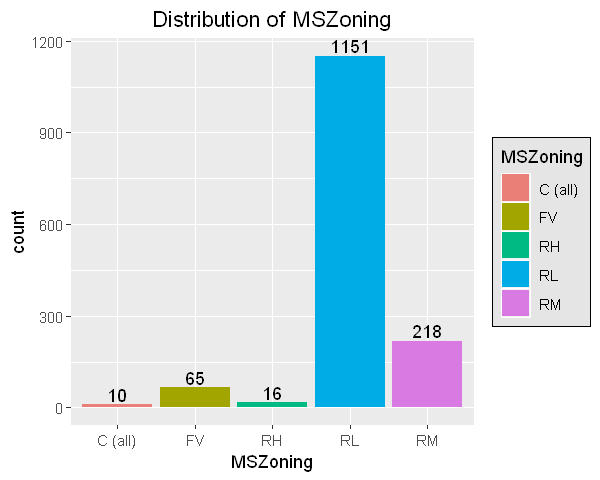

In [27]:
options(repr.plot.width=5, repr.plot.height=4)
ggplot(data, aes(x = MSZoning, fill = MSZoning )) + 
geom_bar()+ 
scale_fill_hue(c = 80)+
ggtitle("Distribution of MSZoning")+
theme(plot.title = element_text(hjust = 0.5),legend.position="right", legend.background = element_rect(fill="grey90",
                                                                                                           size=0.5, linetype="solid", 
                                                                                                           colour ="black"))+
geom_text(stat='count',aes(label=..count..),vjust=-0.25)

It can be deduced from the graph above that most of houses in this dataset are built in the area of Residential Low Density(1151 houses), and follows by Residential Medium Density(218 houses). Few houes are built in Commercial, Floating Village and Residential High Density.

# 1.7 - Boxplot Distrubution of Price in each MSZoning

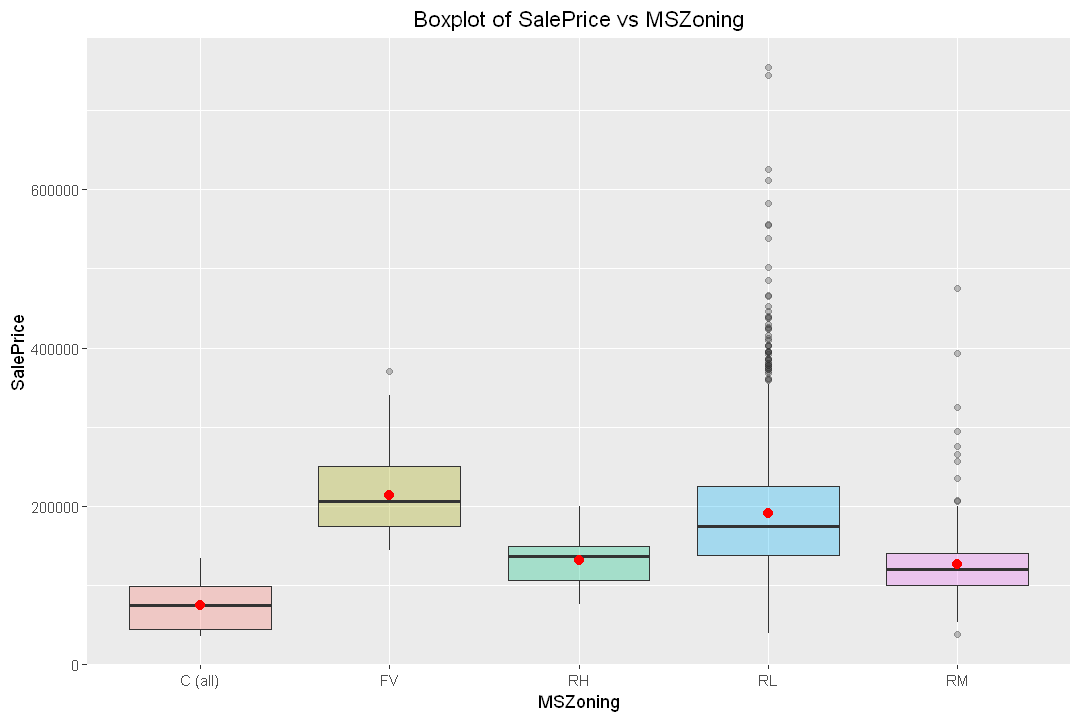

In [28]:
# Change plot size to 9 x 6
options(repr.plot.width=9, repr.plot.height=6)

#boxplot of SalePrice by MSZoning
#add average value of SalePrice as red point

ggplot(data, aes(x=MSZoning, y=SalePrice, fill=MSZoning)) + 
  geom_boxplot(alpha=0.3) +
  stat_summary(fun.y=mean, geom="point", shape=20, size=4, color="red", fill="red")+
  theme(legend.position="none")+
  ggtitle("Boxplot of SalePrice vs MSZoning")+
  theme(plot.title = element_text(hjust = 0.5))

The graph above shows the distribution of SalePrice by MSZoning. The sales in "Floating Village Residential" area have the highest average sale price, and then followed by "Residential Low Density". While "Commercial" sales have the lowest average sale price

Lets visualize SalePrice by different cateogries of BldfType.

BldgType: Type of dwelling

   1Fam : Single-family Detached  
   2FmCon : Two-family Conversion; originally built as one-family dwelling
   Duplx : Duplex
   TwnhsE : Townhouse End Unit
   TwnhsI : Townhouse Inside Unit

# 1.8 - Plotting Historgram of Sale Price vs BldgType

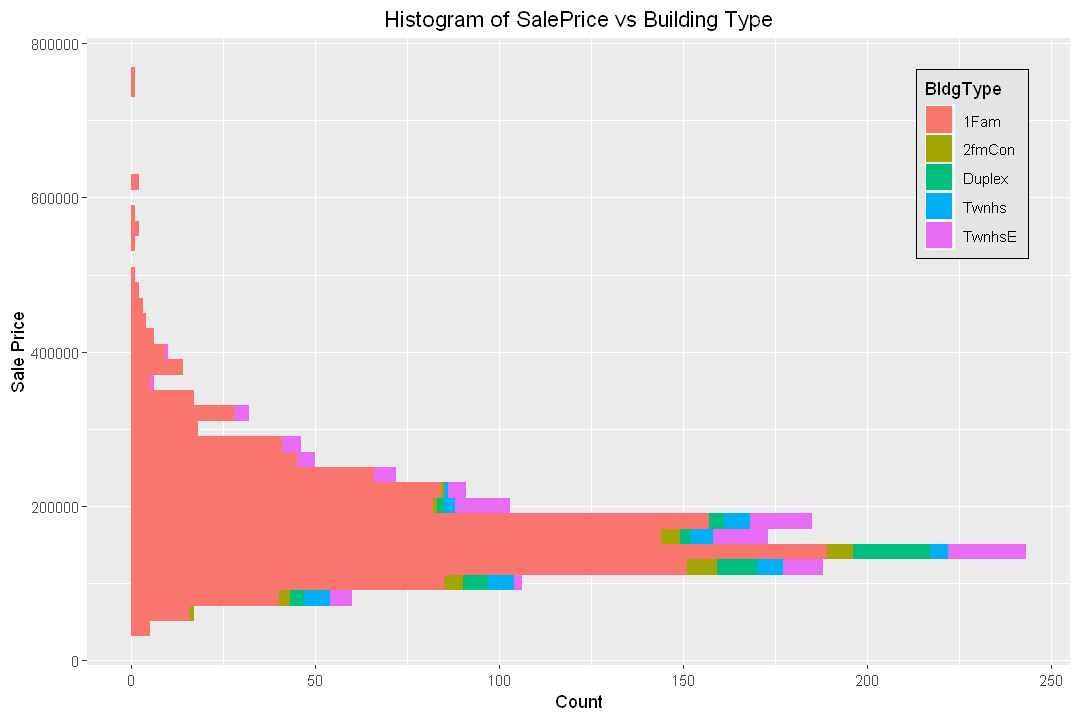

In [29]:
ggplot(data, aes(SalePrice)) +
 geom_histogram(aes(fill = BldgType), position = position_stack(reverse = TRUE), binwidth = 20000) +
 coord_flip() + ggtitle("Histogram of SalePrice vs Building Type") +
 ylab("Count") +
 xlab("Sale Price") + 
 theme(plot.title = element_text(hjust = 0.5),legend.position=c(0.9,0.8), legend.background = element_rect(fill="grey90",
                                                                                                           size=0.5, linetype="solid", 
                                                                                                           colour ="black"))

As we can see from the graph above:
1. Single-family Detached price range from 50,000 to 300,000.
2. Two-family Conversion, Duplex, Townhouse End Unit and Townhouse Inside Unit has price ranging from 75000 to 210000.

# 1.9 - Plotting SalePrice vs Neighborhood

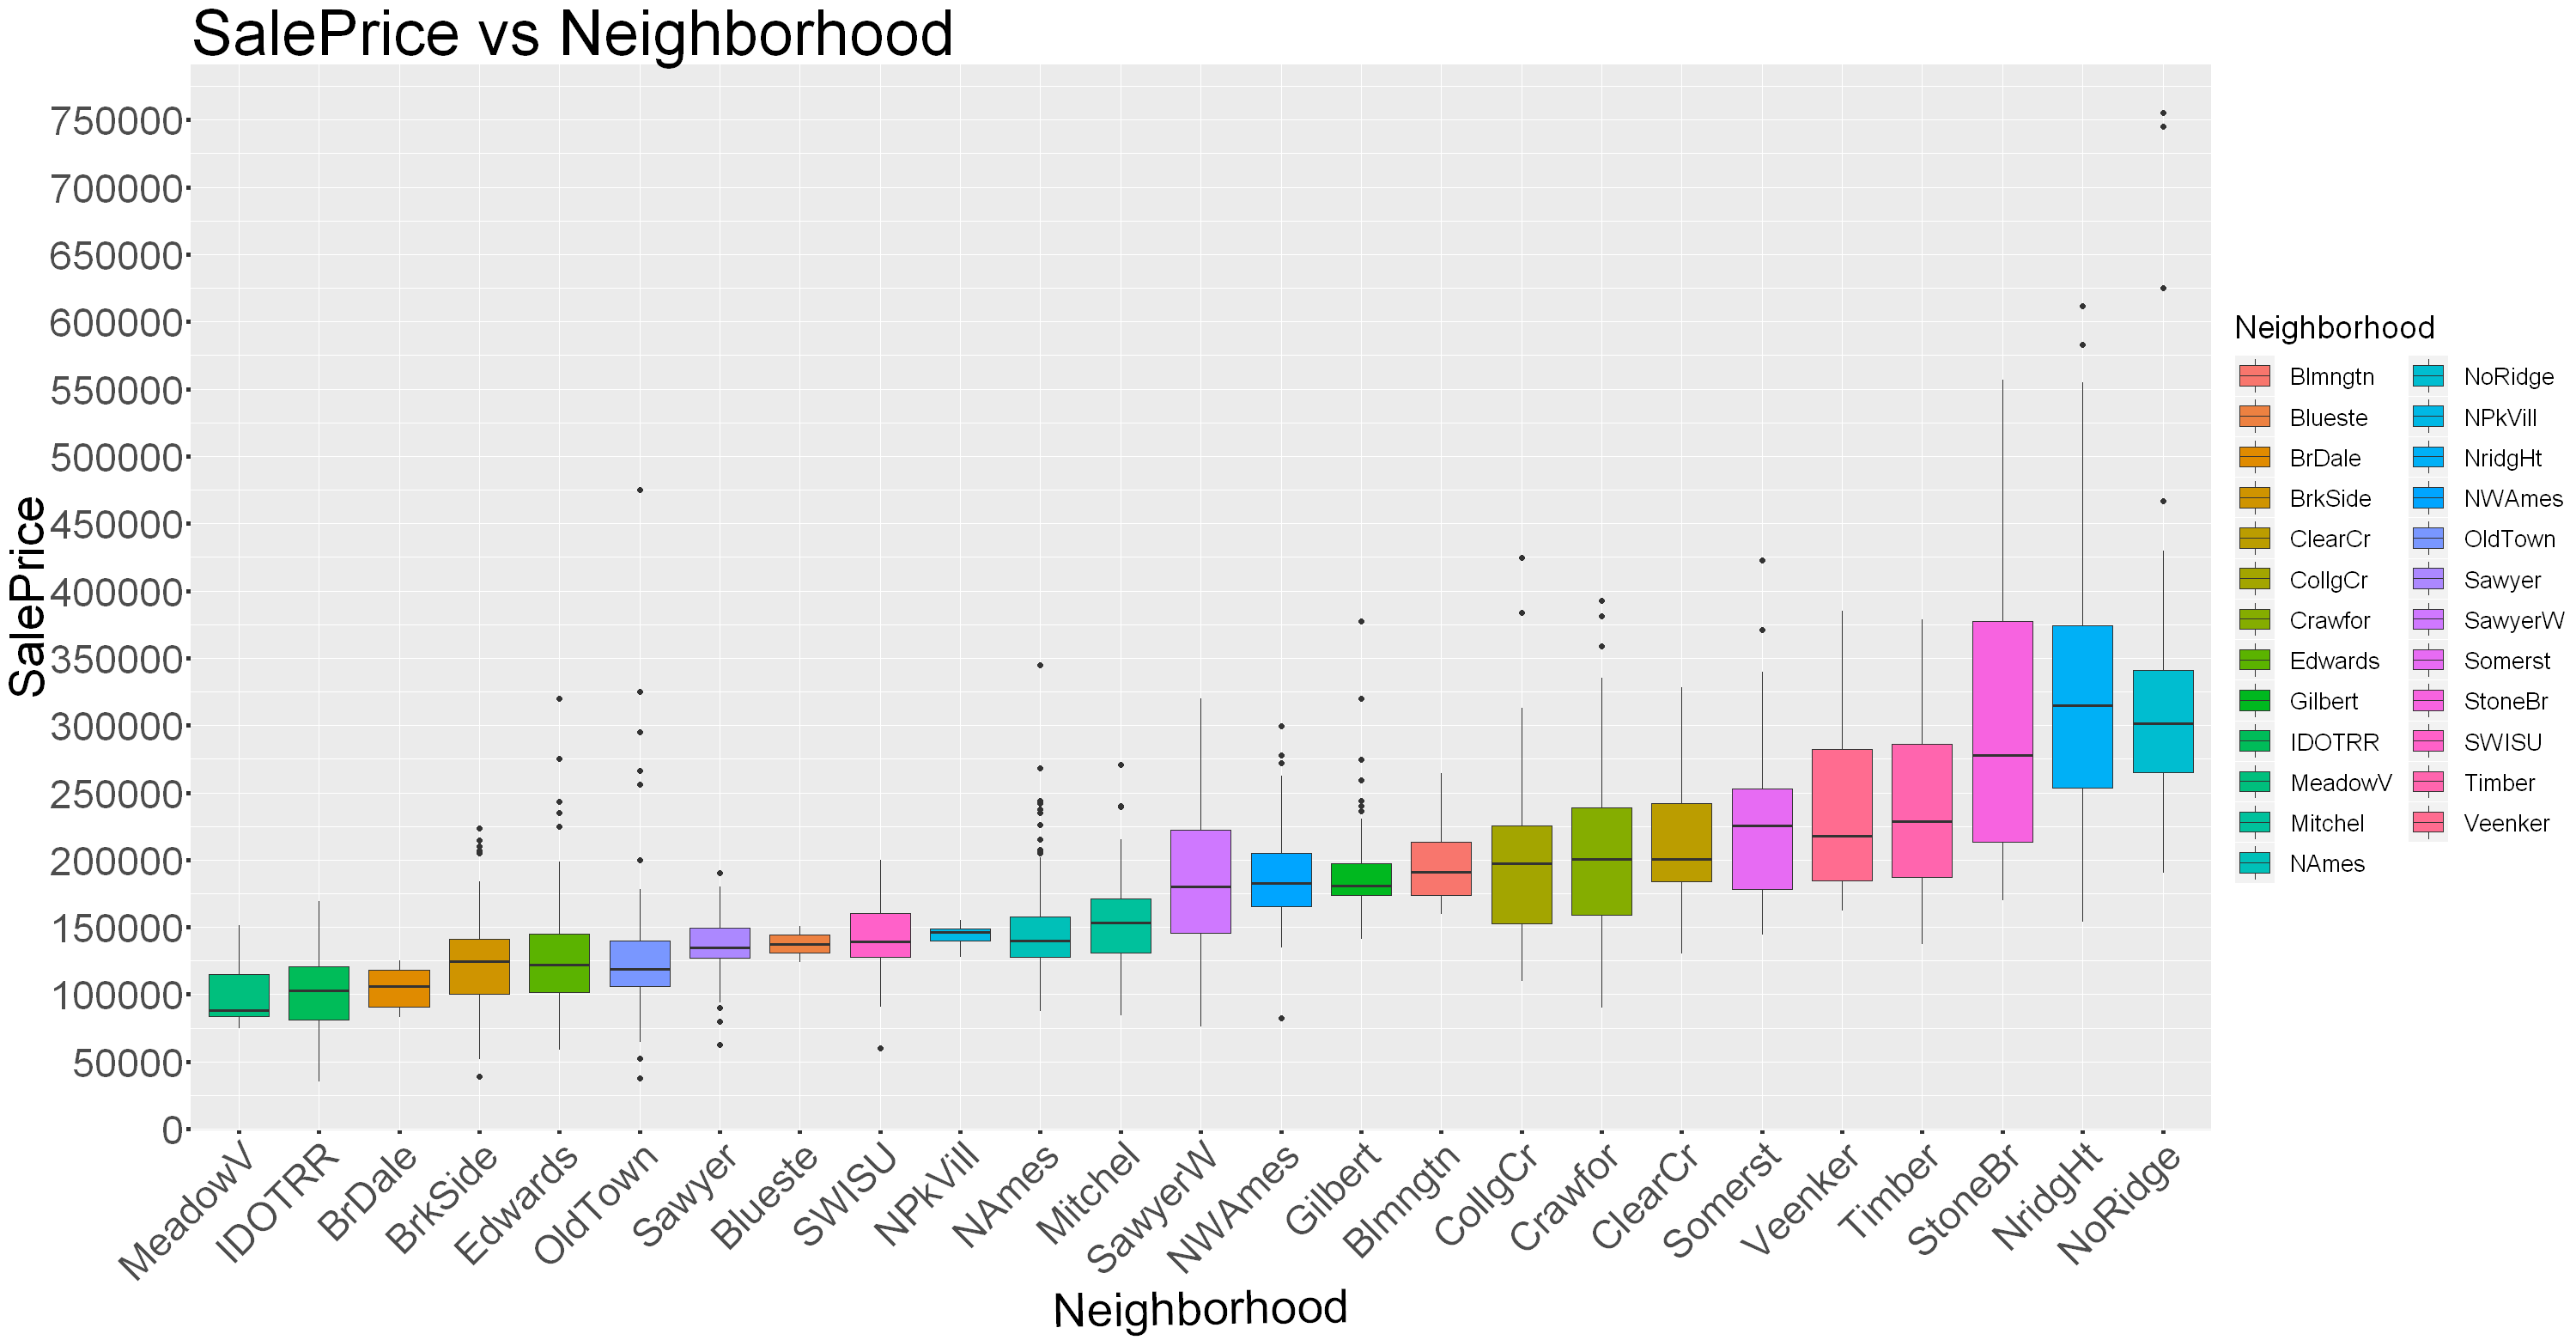

In [30]:
options(repr.plot.width = 25, repr.plot.height = 13) # Defyning plot size
ggplot(aes(x = reorder(Neighborhood,SalePrice), y = SalePrice,fill = Neighborhood),,data = data) +
  geom_boxplot() + labs(x='Neighborhood', y='SalePrice') +
  ggtitle('SalePrice vs Neighborhood')+
  scale_y_continuous(breaks= seq(0, 800000, by=50000))+
  theme(axis.text.x = element_text(angle = 45, hjust = 1)
        ,axis.title = element_text(size = rel(3), angle = 1)
       ,plot.title = element_text(size = rel(4))
        ,axis.text =  element_text(size = rel(2.5))
        ,axis.ticks = element_line(size = 1.5)
       ,legend.key.size = unit(1, "cm")
       ,legend.title = element_text(size=22)
       ,legend.text = element_text(size=16))

# 1.10 - Plotting SalePrice vs GarageCars

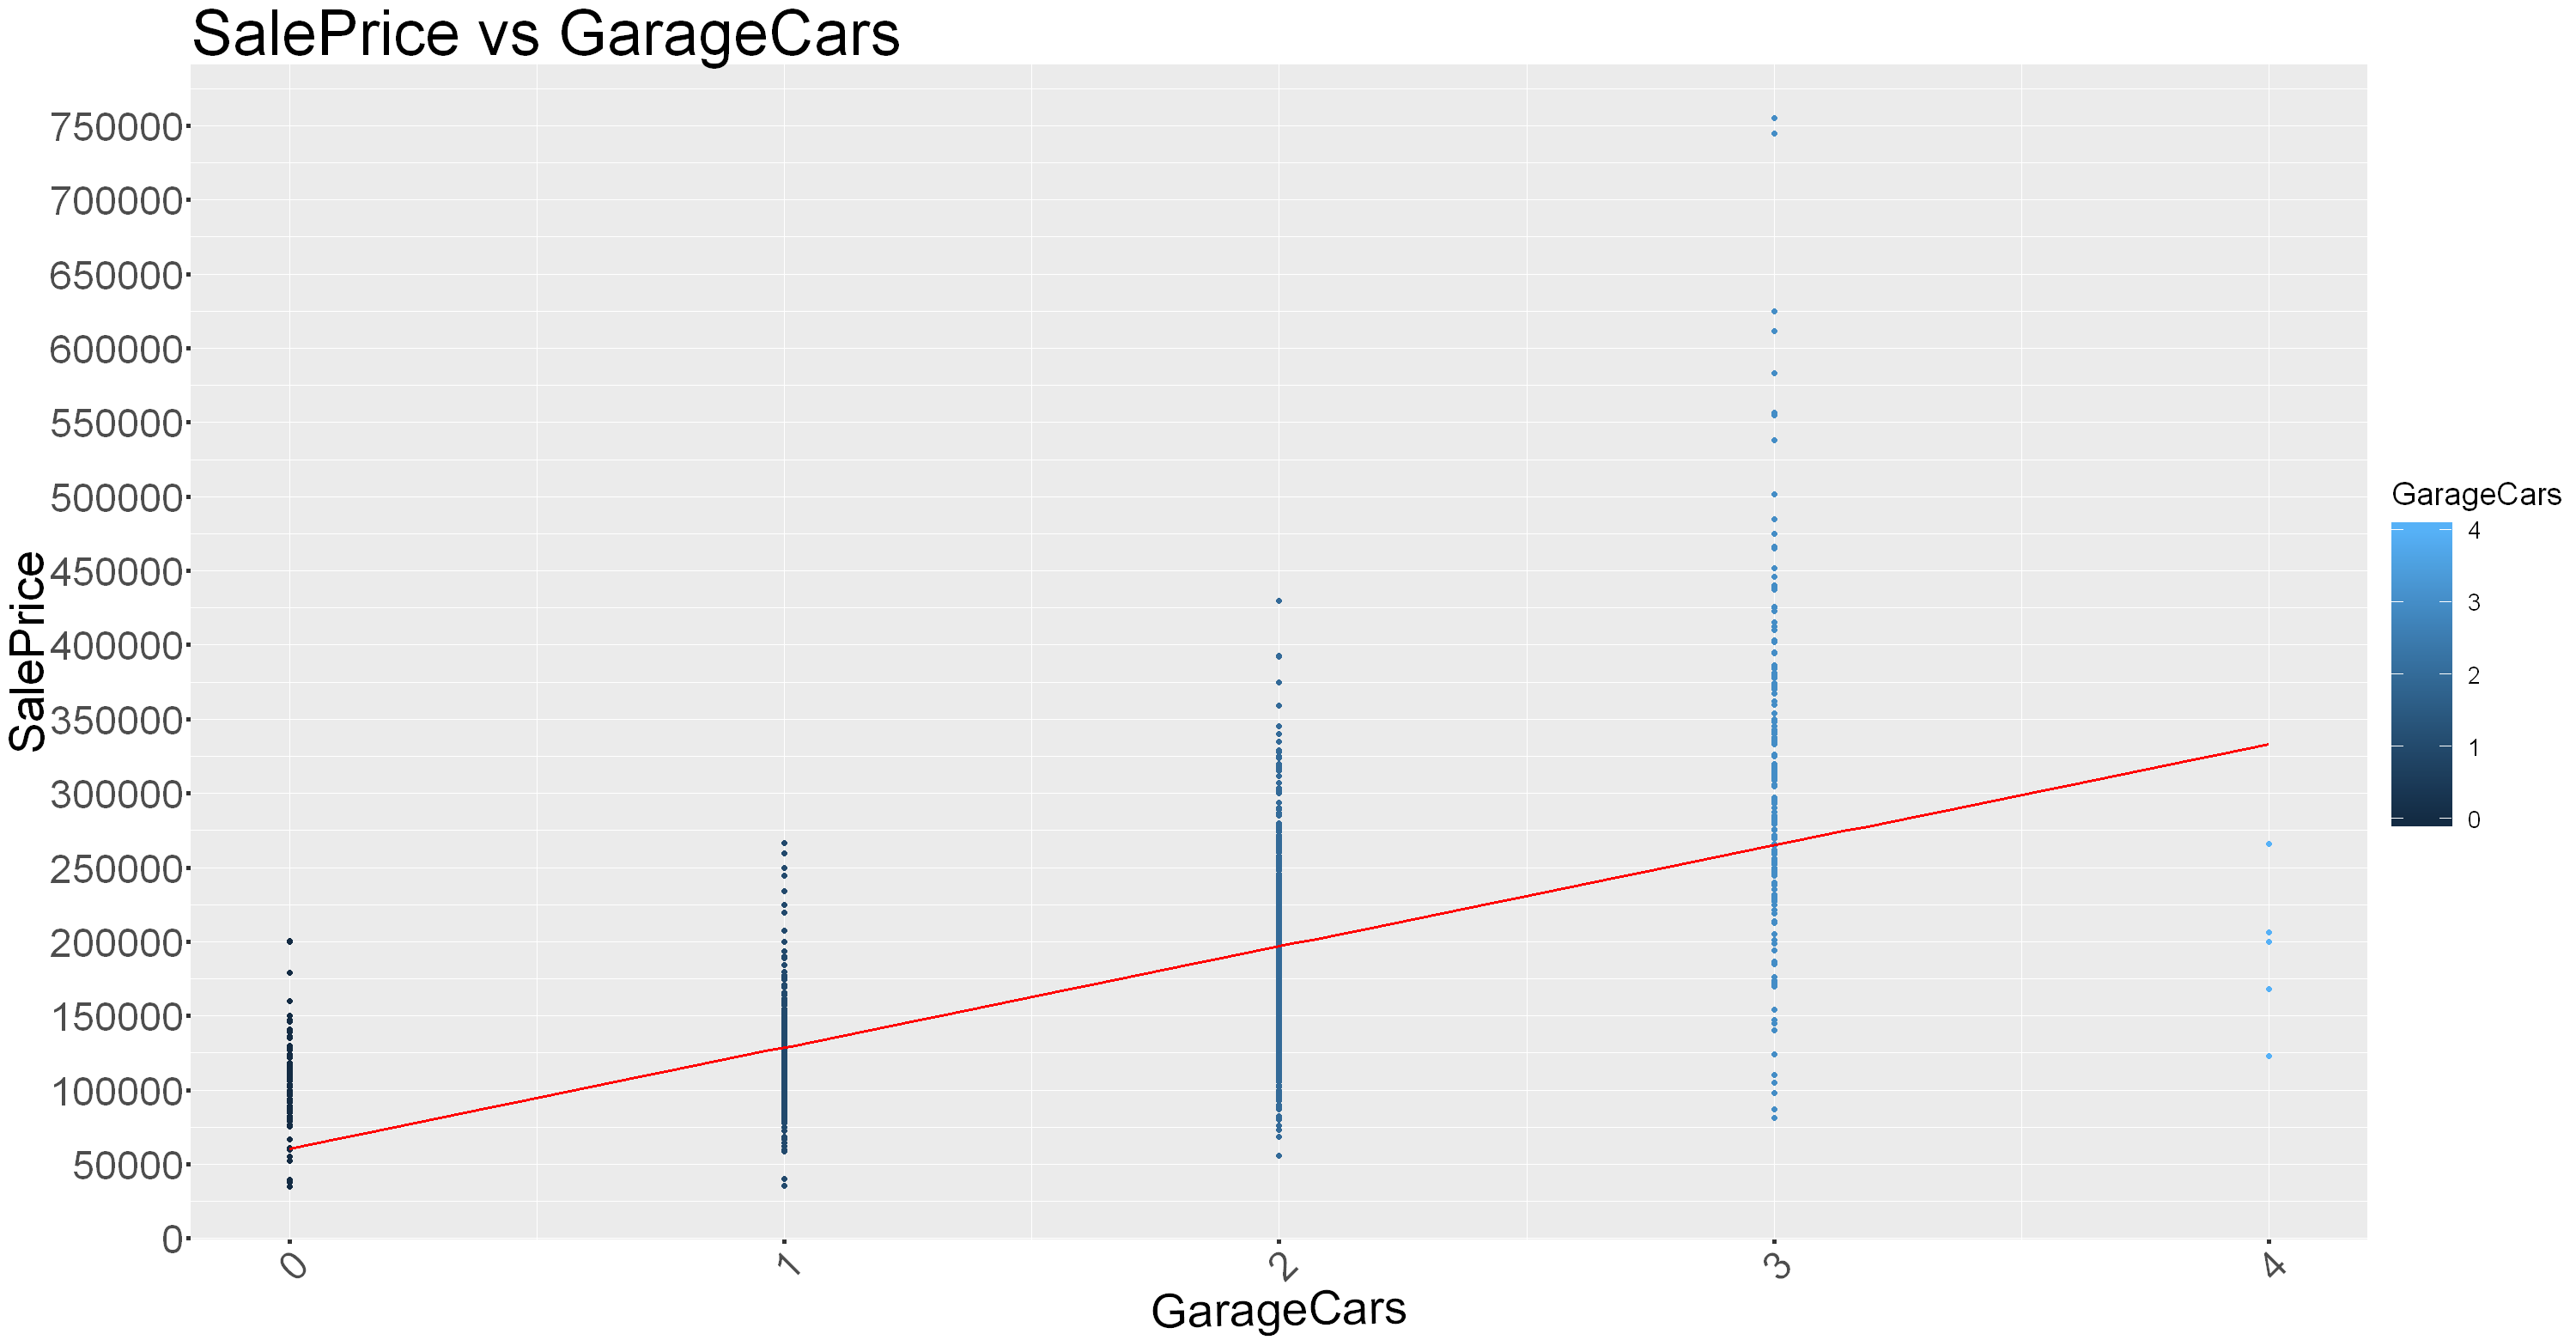

In [31]:
options(repr.plot.width = 25, repr.plot.height = 13) # Defyning plot size
ggplot(aes(x = GarageCars, y = SalePrice,color = GarageCars),,data = data) +
  geom_point() +
  geom_smooth(method = "lm",col ='red', se = FALSE)+
  ggtitle('SalePrice vs GarageCars')+
  scale_y_continuous(breaks= seq(0, 800000, by=50000))+
  theme(axis.text.x = element_text(angle = 45, hjust = 1)
        ,axis.title = element_text(size = rel(3), angle = 1)
       ,plot.title = element_text(size = rel(4))
        ,axis.text =  element_text(size = rel(2.5))
        ,axis.ticks = element_line(size = 1.5)
       ,legend.key.size = unit(1.5, "cm")
       ,legend.title = element_text(size=22)
       ,legend.text = element_text(size=16))

# 1.11 - Plotting SalePrice vs Total Square Feet

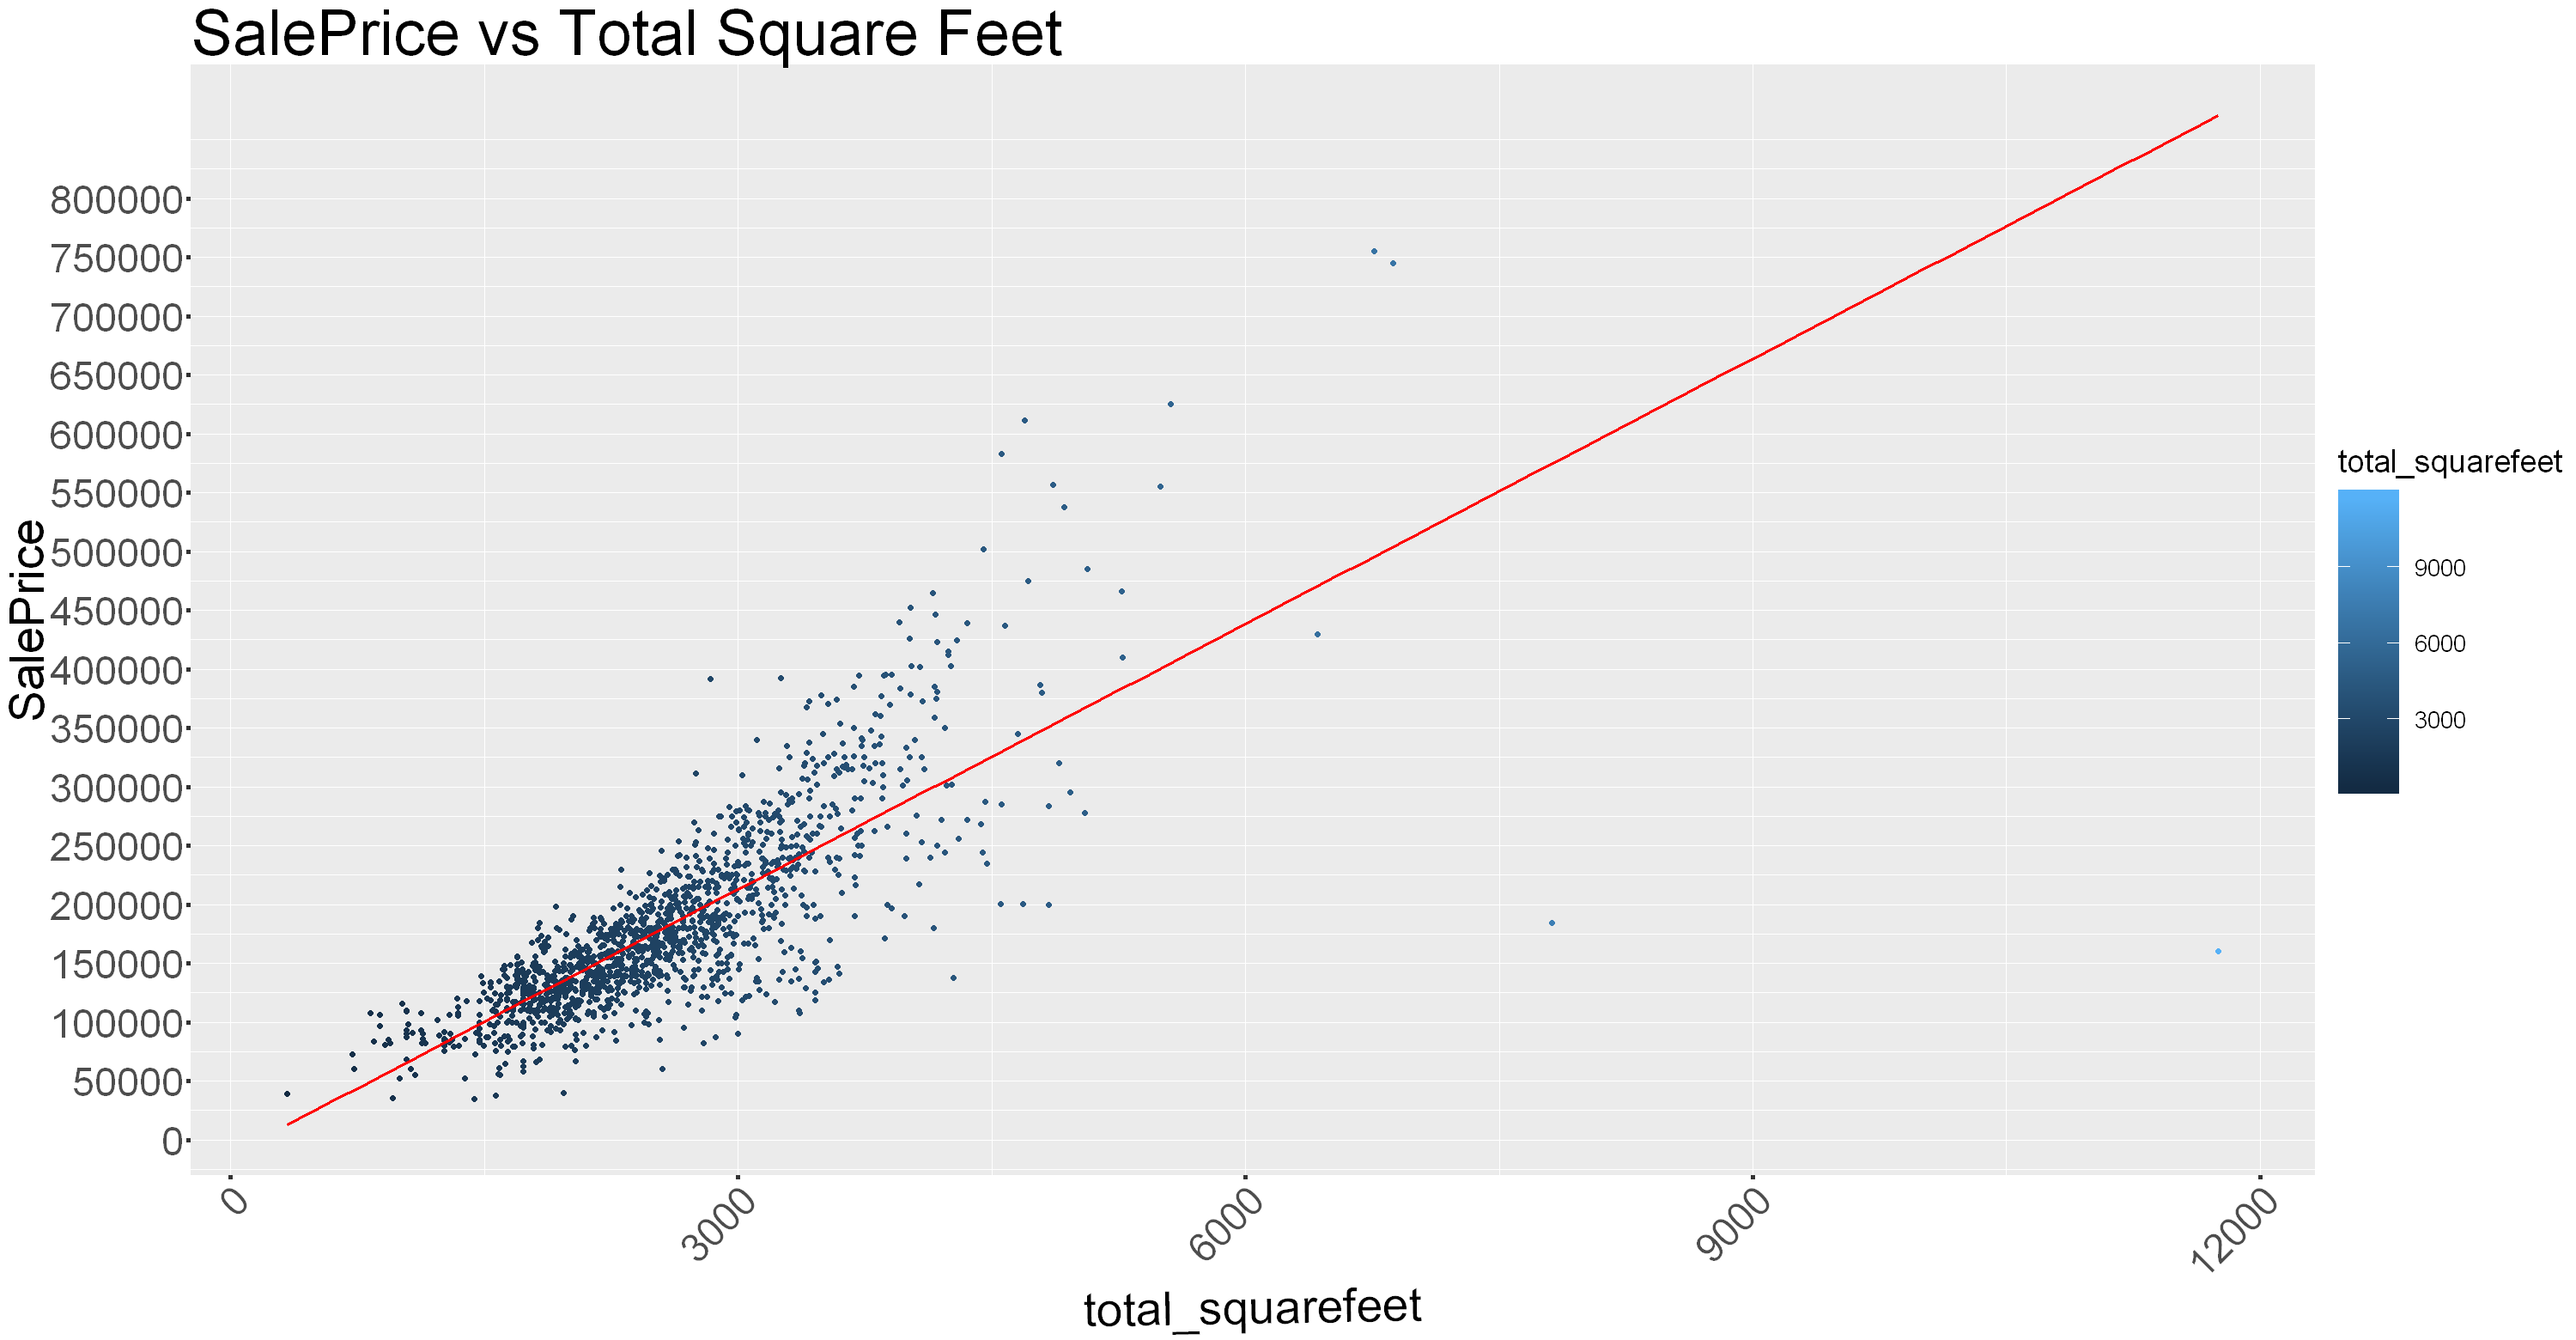

In [32]:
total_squarefeet <- data$GrLivArea + data$TotalBsmtSF

options(repr.plot.width = 25, repr.plot.height = 13) # Defyning plot size
ggplot(aes(x = total_squarefeet, y = SalePrice,color = total_squarefeet),,data = data) +
  geom_point() +
  geom_smooth(method = "lm",col ='red', se = FALSE)+
  ggtitle('SalePrice vs Total Square Feet')+
  scale_y_continuous(breaks= seq(0, 800000, by=50000))+
  theme(axis.text.x = element_text(angle = 45, hjust = 1)
        ,axis.title = element_text(size = rel(3), angle = 1)
       ,plot.title = element_text(size = rel(4))
        ,axis.text =  element_text(size = rel(2.5))
        ,axis.ticks = element_line(size = 1.5)
       ,legend.key.size = unit(1.5, "cm")
       ,legend.title = element_text(size=22)
       ,legend.text = element_text(size=16))

# 1.12 - Plotting Histogram of SalePrice vs Overall Quality

Lets visualize Sale Price by OverallQual.

OverallQual: Rates the overall material and finish of the house

   10   Very Excellent<br>
   9    Excellent<br>
   8    Very Good<br>
   7    Good<br>
   6    Above Average<br>
   5    Average<br>
   4    Below Average<br>
   3    Fair<br>
   2    Poor<br>
   1    Very Poor<br>

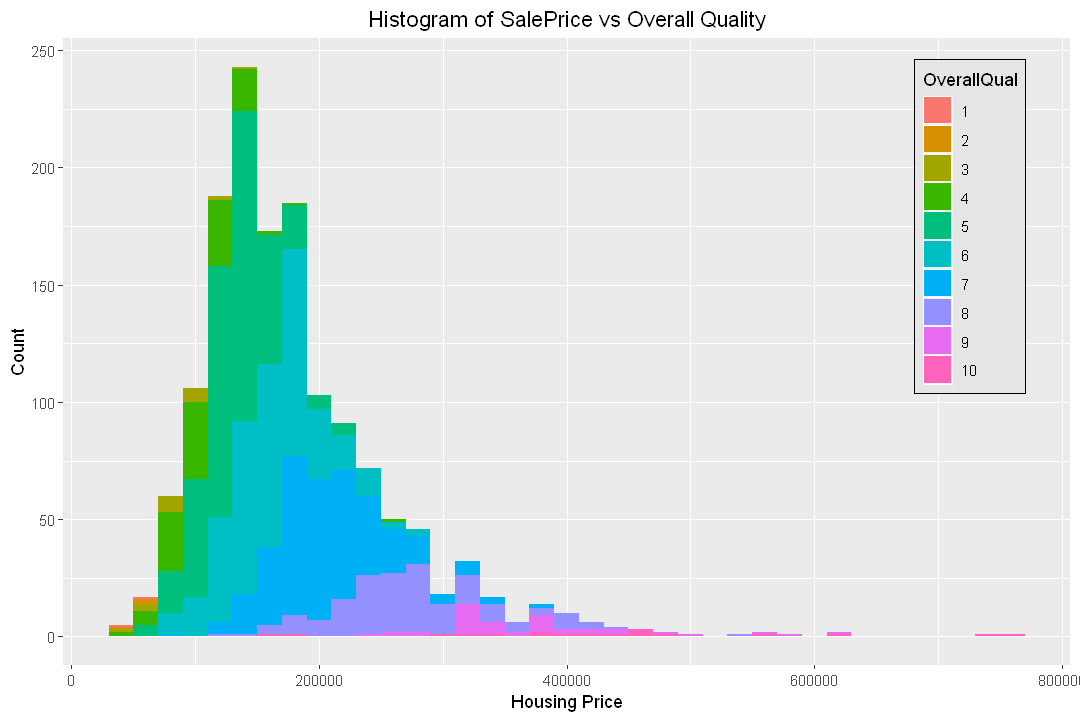

In [50]:
ggplot(data, aes(x = SalePrice,fill = as.factor(OverallQual))) +
  geom_histogram(position = "stack", binwidth = 20000) +
  ggtitle("Histogram of SalePrice vs Overall Quality") +
  ylab("Count") +
  xlab("Housing Price") + 
  scale_fill_discrete(name="OverallQual")+
  theme(plot.title = element_text(hjust = 0.5), legend.position=c(0.9,0.7), 
    legend.background = element_rect(fill="grey90",size=0.5, linetype="solid",colour ="black"))

As we see in graph above most houses are with OverallQuall of 4,5,6 and 7 which is equivalent to "Below Average", "Average", "Above Average" and "Good". Sale Price increases as Overall Quality increases. For each rate level of overall quality, the distribution of house price is almost symmetric.

# 1.13 -  Bar Plots

Lets create some Bar Plots for more insights into the data. 

MSZoning bar plot indicates that majority of the houses are located in low density residential areas and medium density residential area. 

The type of road access to the property tends to be paved and the houses do not have alleys.

Landcontour bar plot shows that the houses are built on flat properties.

Utilities bar plot shows that almost all homes have all public utilities (E,G,W & S).

LandSlope bar plot shows that most of the properties have a gentle slope.

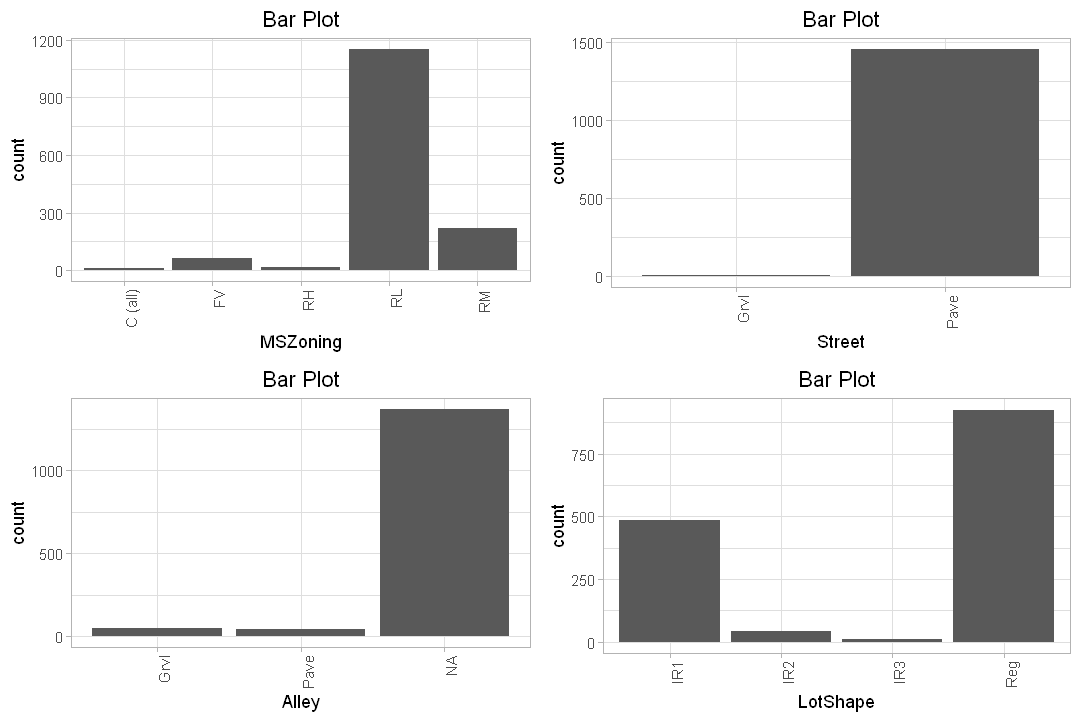

In [51]:
cat_var <- names(train)[which(sapply(train, is.character))]
cat_car <- c(cat_var, 'BedroomAbvGr', 'HalfBath', ' KitchenAbvGr','BsmtFullBath', 'BsmtHalfBath', 'MSSubClass')
numeric_var <- names(train)[which(sapply(train, is.numeric))]

## Creating one training dataset with categorical variable and one with numeric variable. We will use this for data visualization.

train1_cat<-train[cat_var]
train1_num<-train[numeric_var]

## Bar plot/Density plot function

## Bar plot function

plotHist <- function(data_in, i) 
{
  data <- data.frame(x=data_in[[i]])
  p <- ggplot(data=data, aes(x=factor(x))) + stat_count() + xlab(colnames(data_in)[i]) + theme_light() +
    ggtitle("Bar Plot") +
    theme(plot.title = element_text(hjust = 0.5), legend.position=c(0.9,0.7), 
    legend.background = element_rect(fill="grey90",size=0.5, linetype="solid",colour ="black"),
          axis.text.x = element_text(angle = 90, hjust =1))
  return (p)
}

## Density plot function

plotDen <- function(data_in, i){
  data <- data.frame(x=data_in[[i]], SalePrice = data_in$SalePrice)
  p <- ggplot(data= data) + geom_line(aes(x = x), stat = 'density', size = 1,alpha = 1.0) +
    xlab(paste0((colnames(data_in)[i]), '\n', 'Skewness: ',round(skewness(data_in[[i]], na.rm = TRUE), 2))) + ggtitle("Density Plot") +
    theme(plot.title = element_text(hjust = 0.5), legend.position=c(0.9,0.7), 
    legend.background = element_rect(fill="grey90",size=0.5, linetype="solid",colour ="black")) 
  return(p)
  
}

## Function to call both Bar plot and Density plot function

doPlots <- function(data_in, fun, ii, ncol=3) 
{
  pp <- list()
  for (i in ii) {
    p <- fun(data_in=data_in, i=i)
    pp <- c(pp, list(p))
  }
  do.call("grid.arrange", c(pp, ncol=ncol))
}


## Barplots for the categorical features

doPlots(train1_cat, fun = plotHist, ii = 1:4, ncol = 2)

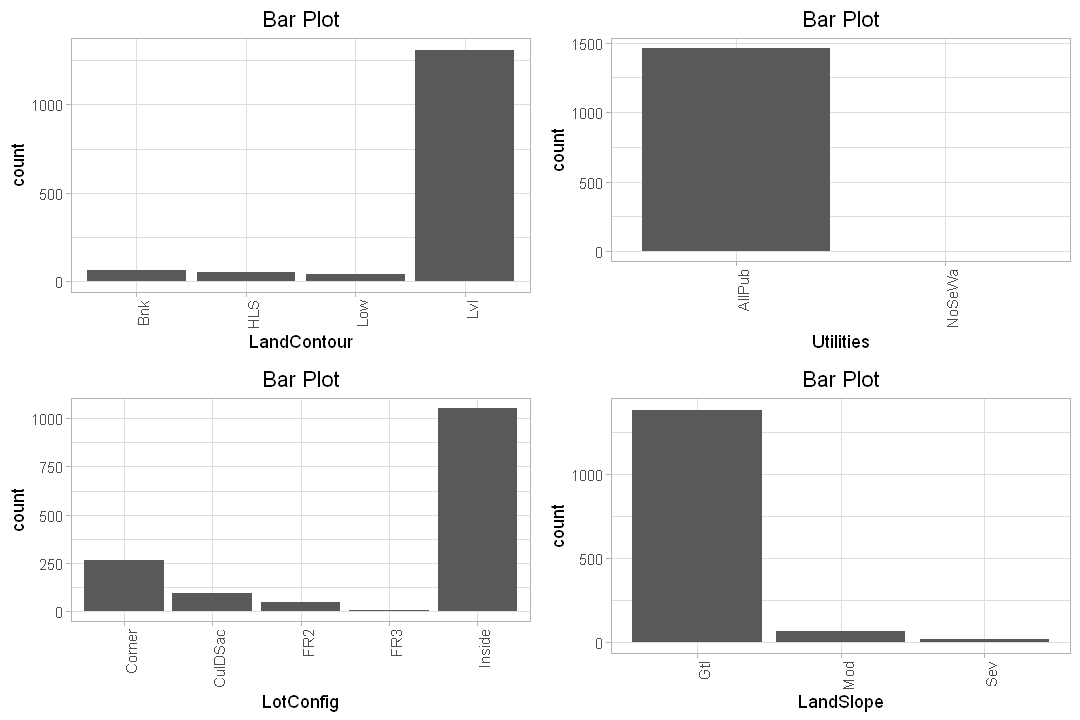

In [28]:
doPlots(train1_cat, fun = plotHist, ii  = 5:8, ncol = 2)

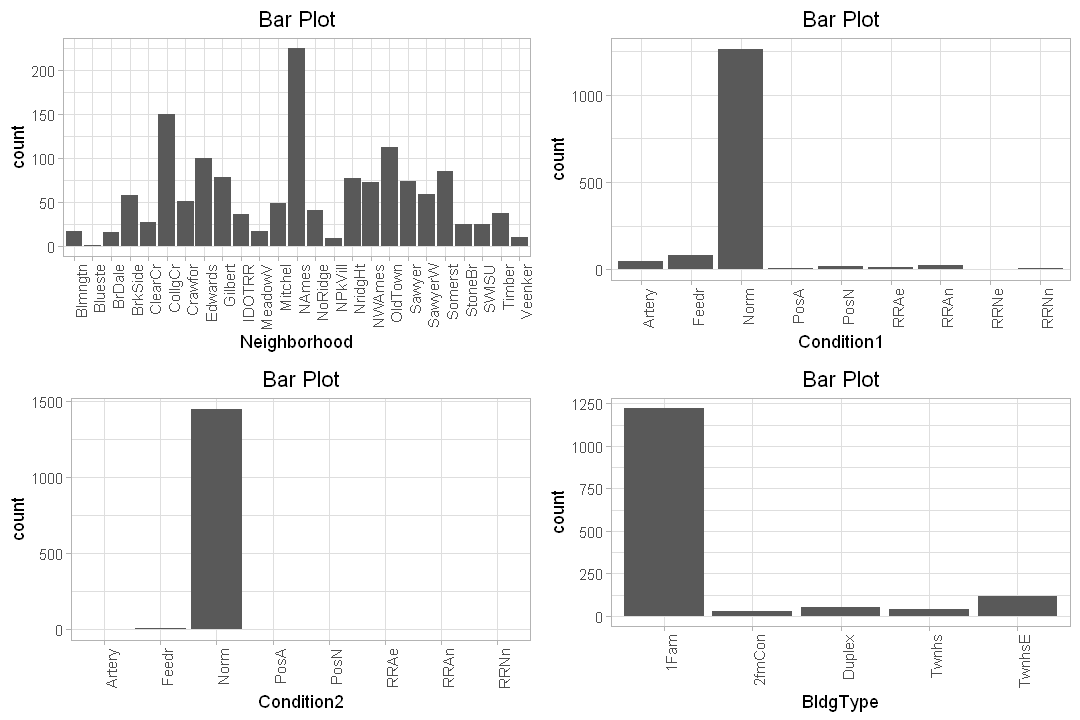

In [29]:
doPlots(train1_cat, fun = plotHist, ii = 9:12, ncol = 2)

It can be deduced from the graphs above that there a few houses that have severe landslope. The houses with moderate landslope are present in more neighborhoods.

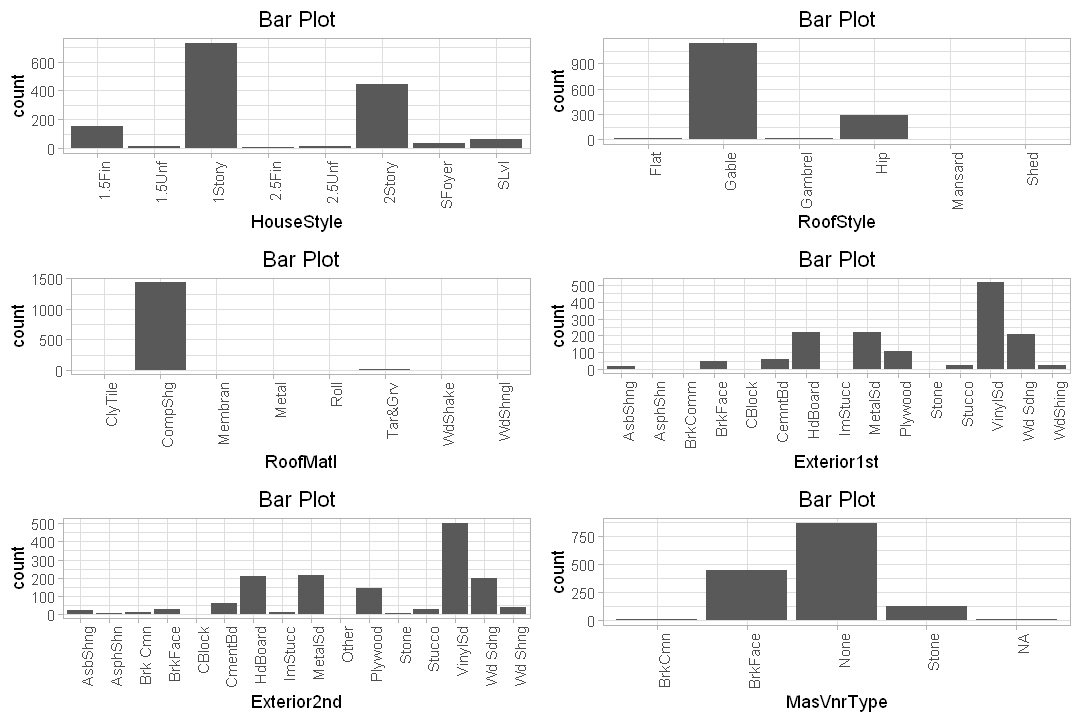

In [30]:
doPlots(train1_cat, fun = plotHist, ii = 13:18, ncol = 2)

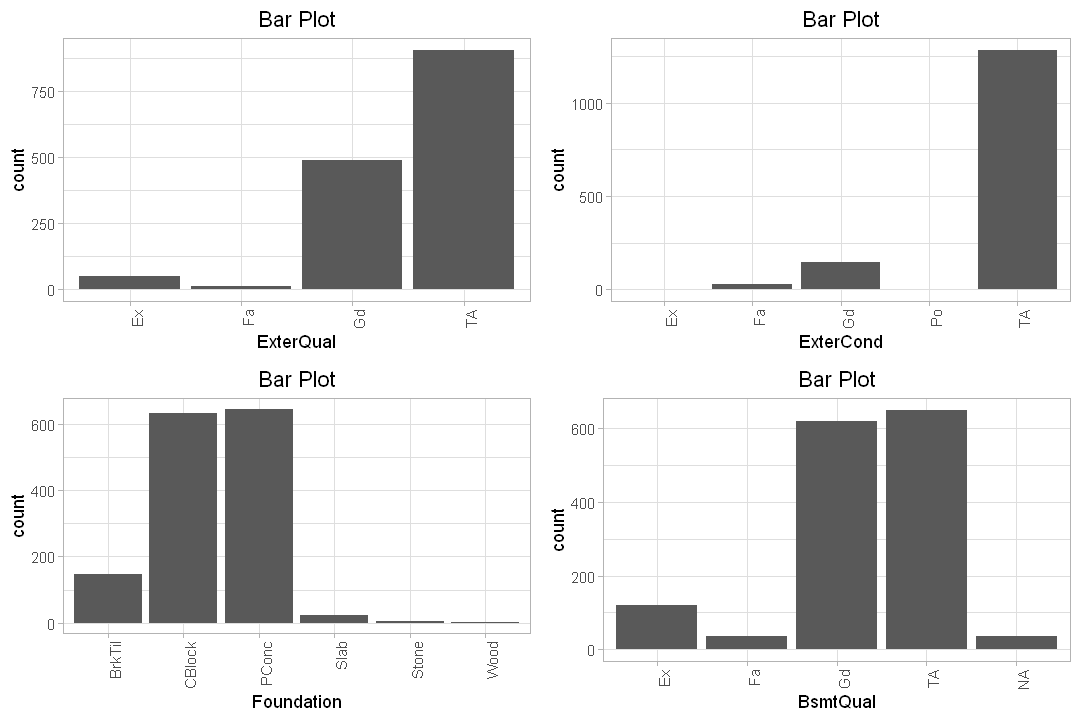

In [31]:
doPlots(train1_cat, fun = plotHist, ii = 19:22, ncol = 2)

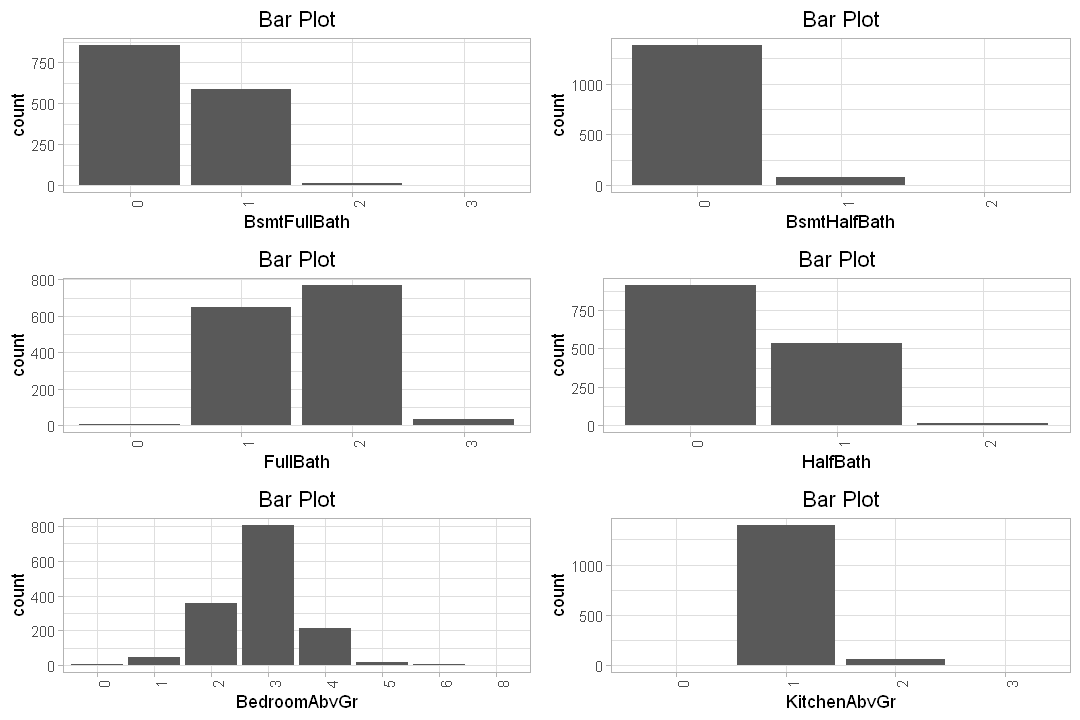

In [32]:
#Histogram for numeric variable
doPlots(train1_num, fun = plotHist, ii = 18:23, ncol = 2)

The histograms above show that majority of the houses have 2 full baths, 0 half baths, and have an average of 3 bedrooms.

# 1.14 - Density Plots

Lets create some density plots for numeric variables. 

The denisty plot below for YearBuilt shows that the data set contains a mix of new and old houses. It shows a downturn in the number of houses in recent years, possibily due to the housing crisis.

Warning message:
"Removed 259 rows containing non-finite values (stat_density)."

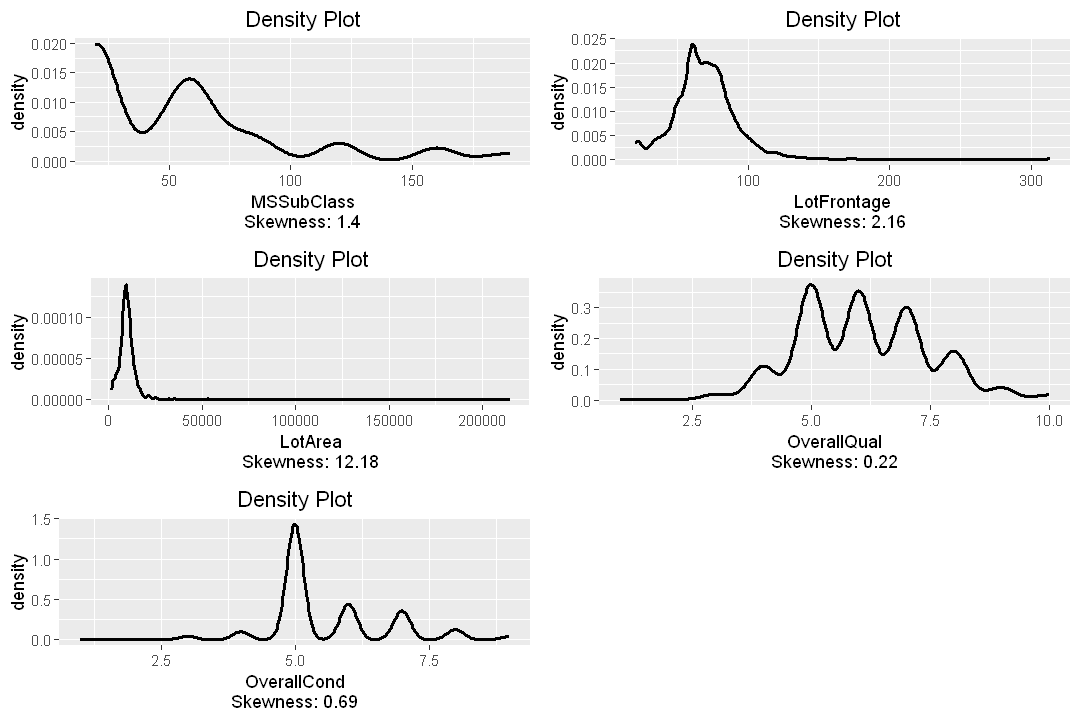

In [35]:
doPlots(train1_num, fun = plotDen, ii = 2:6, ncol = 2)

Warning message:
"Removed 8 rows containing non-finite values (stat_density)."

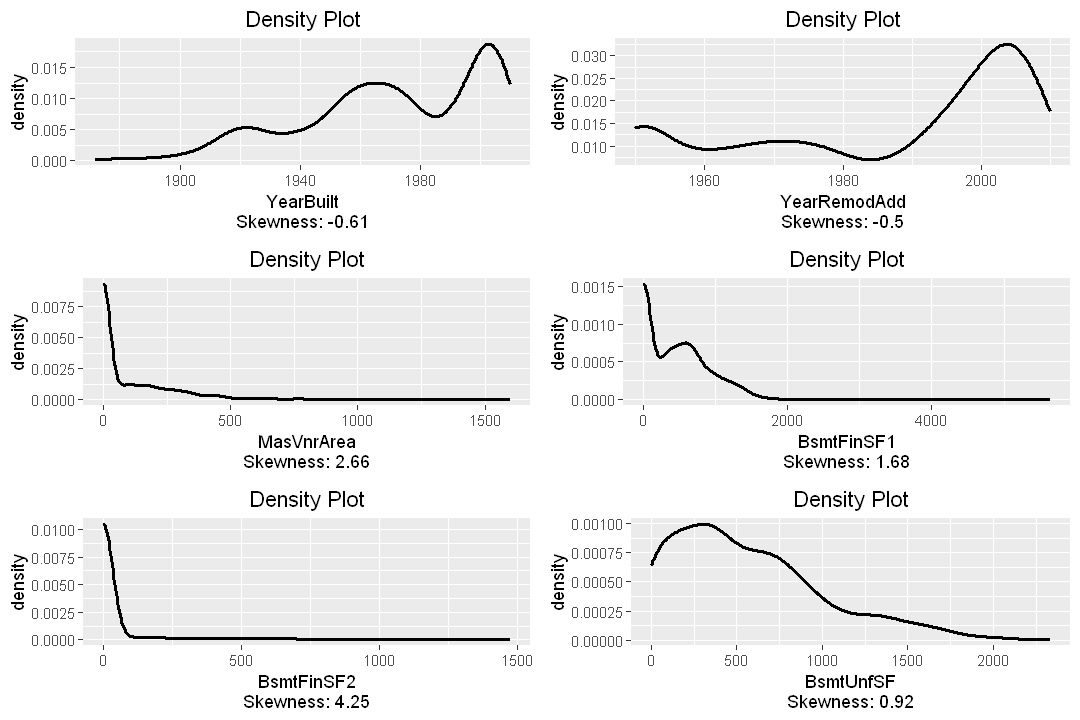

In [18]:
doPlots(train1_num, fun = plotDen, ii = 7:12, ncol = 2)

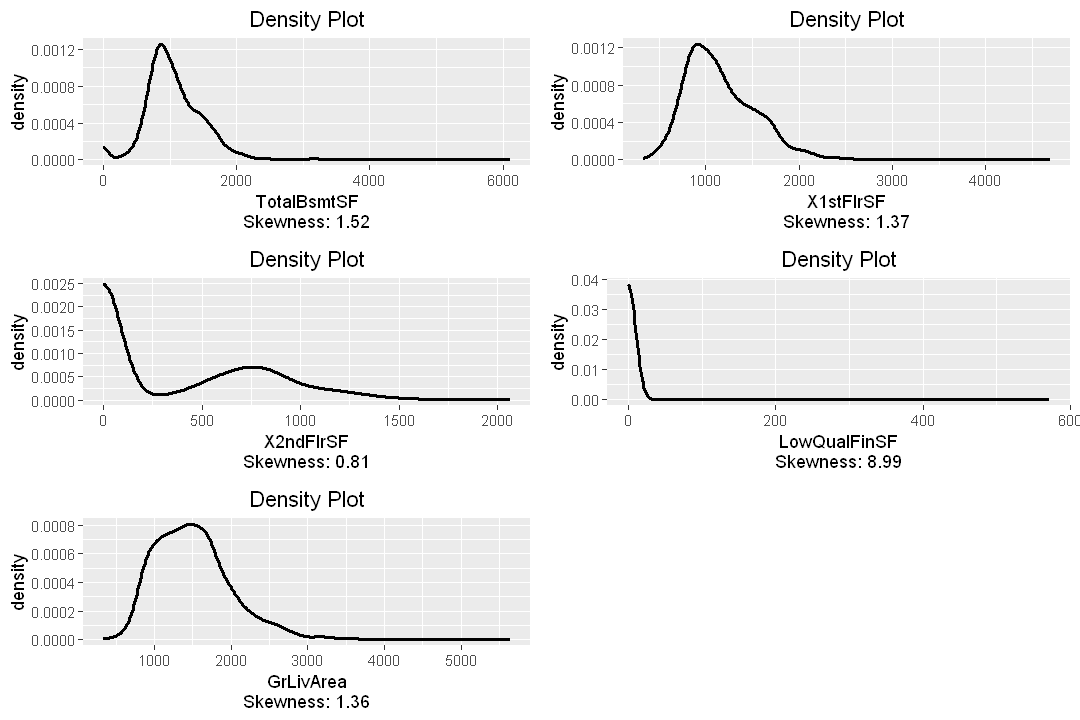

In [19]:
doPlots(train1_num, fun = plotDen, ii = 13:17, ncol = 2)

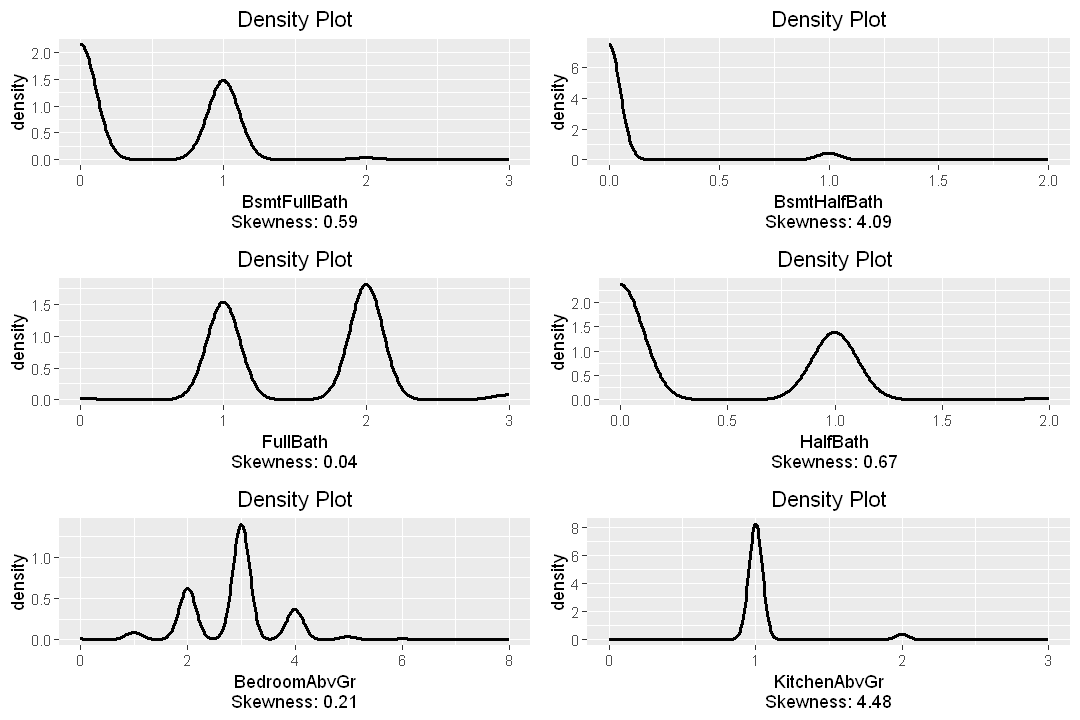

In [21]:
doPlots(train1_num, fun = plotDen, ii = 18:23, ncol = 2)

# Section 2 - Feature Engineering

We will be doing Feature Engineering of the following 3 categories and will analyze it against Sale Price.

1. Number of Bathrooms
2. House Age
3. Neighbourhood

Later we will create a corelation heatmap. 

We will create a feature where we will select the following variables: SalePrice','OverallQual','OverallCond','YearBuilt','ExterCond2','TotalBsmtSF','HeatingQC2'.

Some of these variables needs to be converted to numeric first. We will evaluate quality of the house with ordered levels, such as "Ex", "Fa","Gd", "TA", and "Po", and we will match to numbers: "1","2","3","4", and "5".

In [8]:
all <- rbind(train, data)

In [10]:
numericVars <- which(sapply(all, is.numeric)) #index vector numeric variables
numericVarNames <- names(numericVars) #saving names vector for use later on
cat('There are', length(numericVars), 'numeric variables')

There are 38 numeric variables

In [11]:
all_numVar <- all[, numericVars]
cor_numVar <- cor(all_numVar, use="pairwise.complete.obs") #correlations of all numeric variables

# 2.1 - Number of Bathrooms
There are 4 bathroom variables. Individually, these variables are not very important. However, assume if I add them up into one predictor, this predictor is likely to become a strong one.

In [14]:
all$TotBathrooms <- all$FullBath + (all$HalfBath*0.5) + all$BsmtFullBath + (all$BsmtHalfBath*0.5)

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

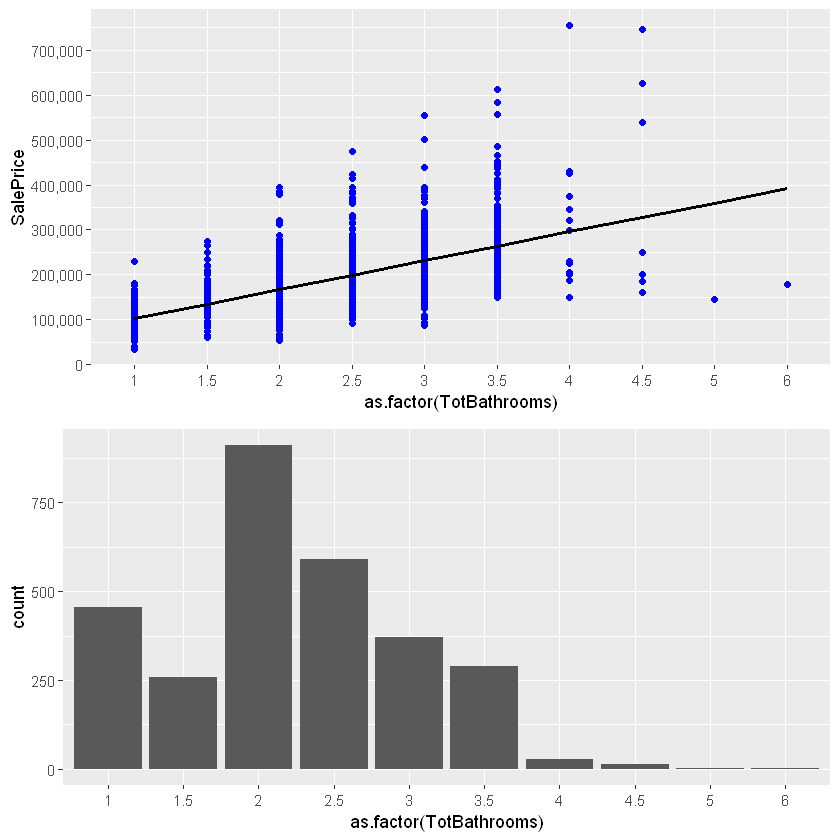

In [15]:
tb1 <- ggplot(data=all[!is.na(all$SalePrice),], aes(x=as.factor(TotBathrooms), y=SalePrice))+
        geom_point(col='blue') + geom_smooth(method = "lm", se=FALSE, color="black", aes(group=1)) +
        scale_y_continuous(breaks= seq(0, 800000, by=100000), labels = comma)
tb2 <- ggplot(data=all, aes(x=as.factor(TotBathrooms))) +
        geom_histogram(stat='count')
grid.arrange(tb1, tb2)

As you can see in the first graph, there now seems to be a clear correlation. The frequency distribution of Bathrooms in all data is shown in the second graph.

# 2.2 - House Age

In [16]:
all$Remod <- ifelse(all$YearBuilt==all$YearRemodAdd, 0, 1) #0=No Remodeling, 1=Remodeling
all$Age <- as.numeric(all$YrSold)-all$YearRemodAdd

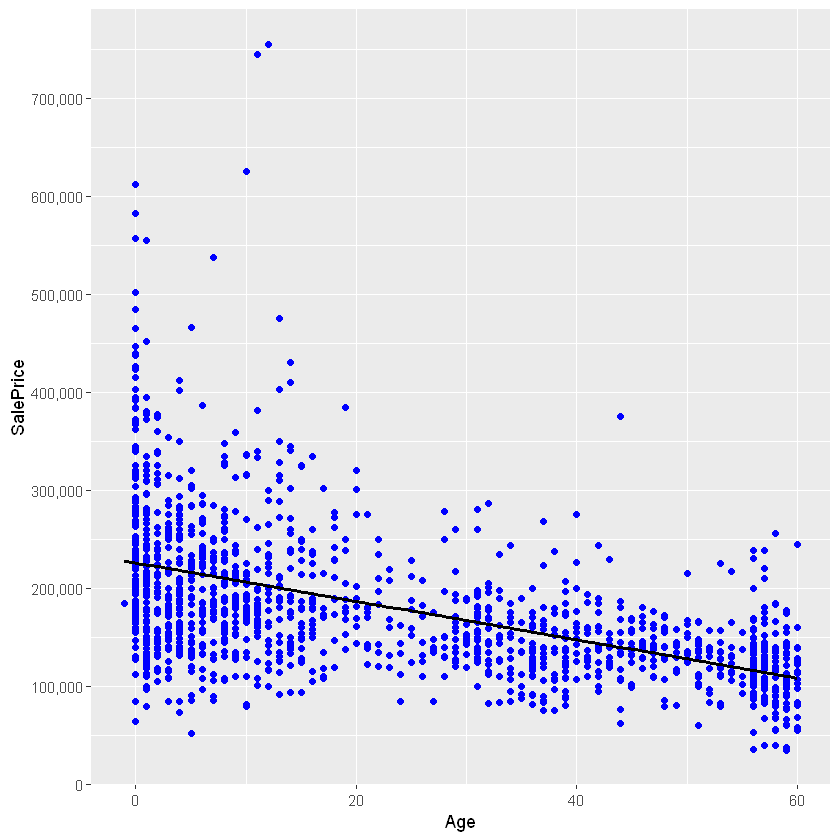

In [17]:
ggplot(data=all[!is.na(all$SalePrice),], aes(x=Age, y=SalePrice))+
        geom_point(col='blue') + geom_smooth(method = "lm", se=FALSE, color="black", aes(group=1)) +
        scale_y_continuous(breaks= seq(0, 800000, by=100000), labels = comma)

As expected, the graph shows a negative correlation with Age (old house are worth less).

# 2.3 - Neighbourhood

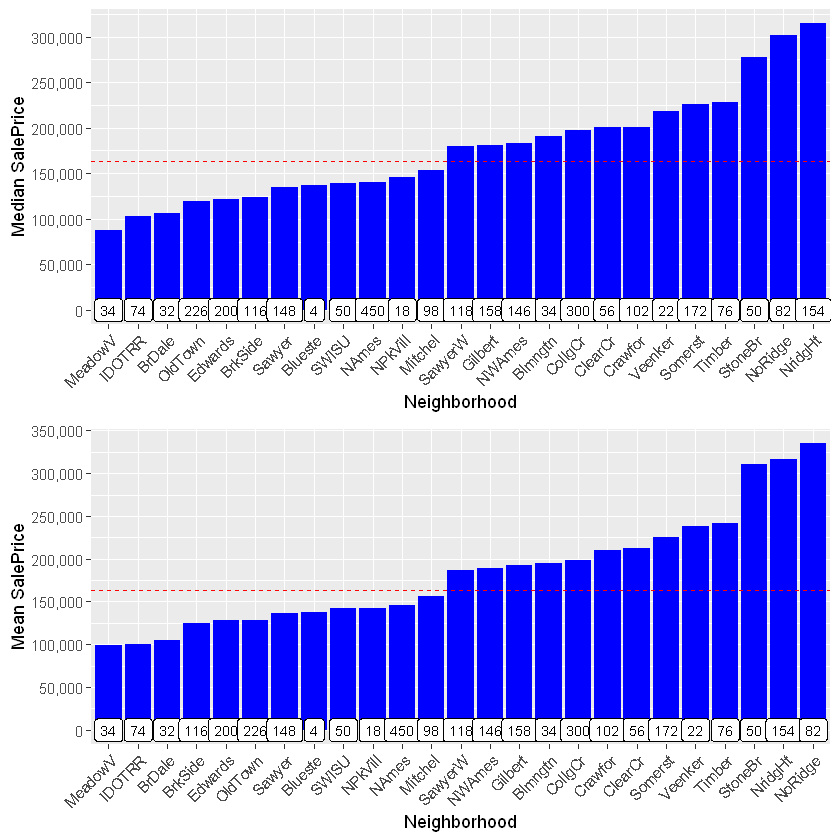

In [18]:
nb1 <- ggplot(all[!is.na(all$SalePrice),], aes(x=reorder(Neighborhood, SalePrice, FUN=median), y=SalePrice)) +
        geom_bar(stat='summary', fun.y = "median", fill='blue') + labs(x='Neighborhood', y='Median SalePrice') +
        theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
        scale_y_continuous(breaks= seq(0, 800000, by=50000), labels = comma) +
        geom_label(stat = "count", aes(label = ..count.., y = ..count..), size=3) +
        geom_hline(yintercept=163000, linetype="dashed", color = "red") #dashed line is median SalePrice
nb2 <- ggplot(all[!is.na(all$SalePrice),], aes(x=reorder(Neighborhood, SalePrice, FUN=mean), y=SalePrice)) +
        geom_bar(stat='summary', fun.y = "mean", fill='blue') + labs(x='Neighborhood', y="Mean SalePrice") +
        theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
        scale_y_continuous(breaks= seq(0, 800000, by=50000), labels = comma) +
        geom_label(stat = "count", aes(label = ..count.., y = ..count..), size=3) +
        geom_hline(yintercept=163000, linetype="dashed", color = "red") #dashed line is median SalePrice
grid.arrange(nb1, nb2)

As we can see from the graphs above that 3 neighborhoods are relatively cheap. 

# 2.4 - Correlation Heatmap

In [25]:
# convert factor to numeric

data$ExterCond2 <- as.numeric(factor(data$ExterCond, 
                                  levels = c("Ex", "Fa","Gd", "TA","Po"),
                                  labels = c(5,2,4,3,1) ,ordered = TRUE))
data$HeatingQC2 <- as.numeric(factor(data$HeatingQC, 
                                  levels = c("Ex", "Fa","Gd", "TA","Po"),
                                  labels = c(5,2,4,3,1) ,ordered = TRUE))
data$CentralAir2 <- as.numeric(factor(data$CentralAir, 
                                  levels = c("N", "Y"),
                                  labels = c(0,1) ,ordered = TRUE))


In [26]:
#select variables that be used for model buidling and heat map

model_var <- c('SalePrice', 
                'OverallQual','OverallCond','YearBuilt','ExterCond2',
                'TotalBsmtSF','HeatingQC2', 
                'CentralAir2','GrLivArea','BedroomAbvGr','KitchenAbvGr',
                'TotRmsAbvGrd','Fireplaces',
                'GarageArea','OpenPorchSF','PoolArea',
                 'YrSold')
heat <- data[,model_var]


Attaching package: 'reshape2'

The following objects are masked from 'package:data.table':

    dcast, melt



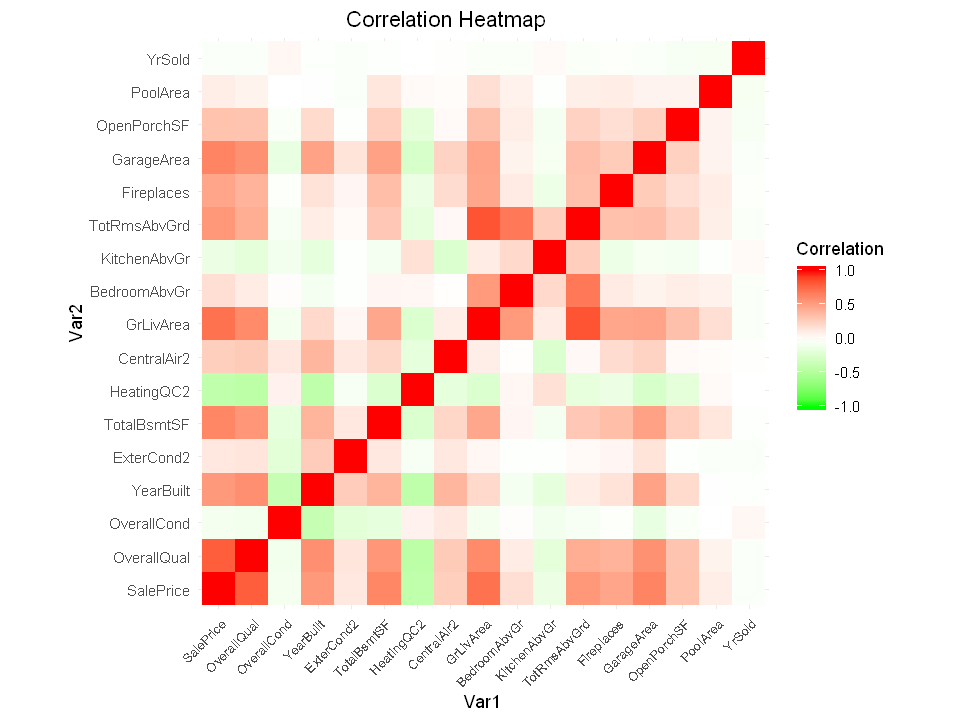

In [27]:
#Ploting Correlation Heatmap for SalePrice

options(repr.plot.width=8, repr.plot.height=6)
library(ggplot2)
library(reshape2)
qplot(x=Var1, y=Var2, data=melt(cor(heat, use="p")), fill=value, geom="tile") +
   scale_fill_gradient2(low = "green", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Correlation") +
   theme_minimal()+ 
   theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 8, hjust = 1))+
   coord_fixed()+
   ggtitle("Correlation Heatmap") +
   theme(plot.title = element_text(hjust = 0.4))

In this graph above, Red indicates perfect positive correlation and Green indicates perfect negative correlation. 

As we can see, there are several variables should be paid attention to: GarageArea, Fireplaces, TotRmsAbvGrd, GrLivArea, HeatingQC, TotalBsmtSF and YearBuild.

# Section 3 - Model  Building -  Training and Testing

# 3.1 - Linear Regression Model

We are selecting the following 16 variables to fit into this model. Variables include:

SalePrice, OverallQual, OverallCond, YearBuilt, ExterQual2, ExterCond2, TotalBsmtSF, HeatingQC2, CentralAir2, GrLivArea, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageArea,
OpenPorchSF, PoolArea,YrSold

In Linear Regresion Model, the relationships between Dependent and Indepedent Variables is expressed by equation with coefficients. The aim of this model is to minimize the sum of the squared residuals. 

Steps:
1- We will select variables and tranfer SalePrice into log term. 
2- We will divide dataset into two parts. Training and Validation. 
3- Run regression. 
4- Check for accuracy.


In [28]:
#prediction of lm
#build model dataset for linear regression 
model_lin <- data[, model_var]
model_lin$lSalePrice <- log(model_lin$SalePrice)

In [29]:
#partition data

set.seed(10000)
data.index <- sample(c(1:dim(model_lin)[1]), dim(model_lin)[1]*0.8)
model_lin_data = model_lin[data.index,]
model_lin_valid <- model_lin[-data.index,]

In [30]:
linreg <- lm(lSalePrice~.-SalePrice, data = model_lin_data)
summary(linreg)


Call:
lm(formula = lSalePrice ~ . - SalePrice, data = model_lin_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.98613 -0.07164  0.00209  0.08015  0.55020 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.750e+01  7.114e+00   2.460  0.01402 *  
OverallQual   8.057e-02  5.757e-03  13.996  < 2e-16 ***
OverallCond   5.664e-02  4.893e-03  11.576  < 2e-16 ***
YearBuilt     3.177e-03  2.422e-04  13.120  < 2e-16 ***
ExterCond2    2.627e-02  1.171e-02   2.244  0.02503 *  
TotalBsmtSF   1.115e-04  1.344e-05   8.301 2.86e-16 ***
HeatingQC2   -1.828e-02  4.076e-03  -4.486 7.99e-06 ***
CentralAir2   6.343e-02  2.300e-02   2.757  0.00592 ** 
GrLivArea     2.026e-04  1.946e-05  10.414  < 2e-16 ***
BedroomAbvGr -4.556e-03  8.486e-03  -0.537  0.59143    
KitchenAbvGr -6.642e-02  2.534e-02  -2.621  0.00887 ** 
TotRmsAbvGrd  1.726e-02  6.232e-03   2.770  0.00570 ** 
Fireplaces    6.900e-02  8.546e-03   8.074 1.70e-15 ***
GarageArea    2.384e-04  2

In [31]:
install.packages("forecast")

Installing package into 'C:/Users/Munazzam/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'forecast' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Munazzam\AppData\Local\Temp\RtmpwXZmsS\downloaded_packages


In [32]:
library(forecast)

#use predict() to make prediction on a new set

pred1 <- predict(linreg,model_lin_valid,type = "response")
residuals <- model_lin_valid$lSalePrice - pred1
linreg_pred <- data.frame("Predicted" = pred1, "Actual" = model_lin_valid$lSalePrice, "Residual" = residuals)
accuracy(pred1, model_lin_valid$lSalePrice)

Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


,ME,RMSE,MAE,MPE,MAPE
Test set,0.007261273,0.1538444,0.1075528,0.04271564,0.9029266


ME: Mean Error

RMSE: Root Mean Squared Error

MAE: Mean Absolute Error

MPE: Mean Percentage Error

MAPE: Mean Absolute Percentage Error

As we can see from the results above, RMSE value is very small. 

RMSE values < 0.1 is very satisfactory.
RMSE value ≥0.5 reflects the poor ability of the model to accurately predict the data.

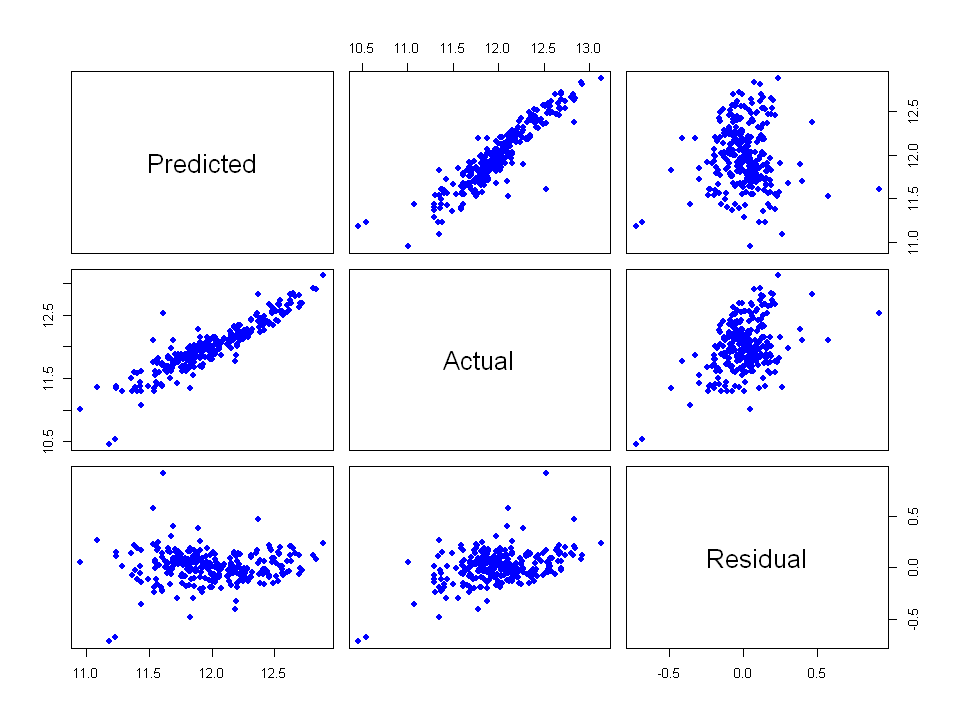

In [38]:
#Scatter Plot
plot(linreg_pred, pch = 16, col = "blue")

Scatter plots are one of the richest form of data visualization. You can tell pretty much everything from it. Ideally, all your points should be close to a regressed diagonal line.

As we can see from the plot above all the actual data lies between 11 and 13. and so are the predictions.

# 3.2 - Random Forest

In Random Forest, idea is to:

1- Draw multiple random samples with replacement from the data.
2- Using random subset of predictors at each stage, fit a classification (regression) tree to each sample and create a forest.
3- Combine predictions/classifications from each tree to get improved predictions. 


In [42]:
library(randomForest)
RF <- randomForest(lSalePrice ~.-SalePrice, data = model_lin_data, 
                   importance =TRUE,ntree=500,nodesize=7, na.action=na.roughfix)

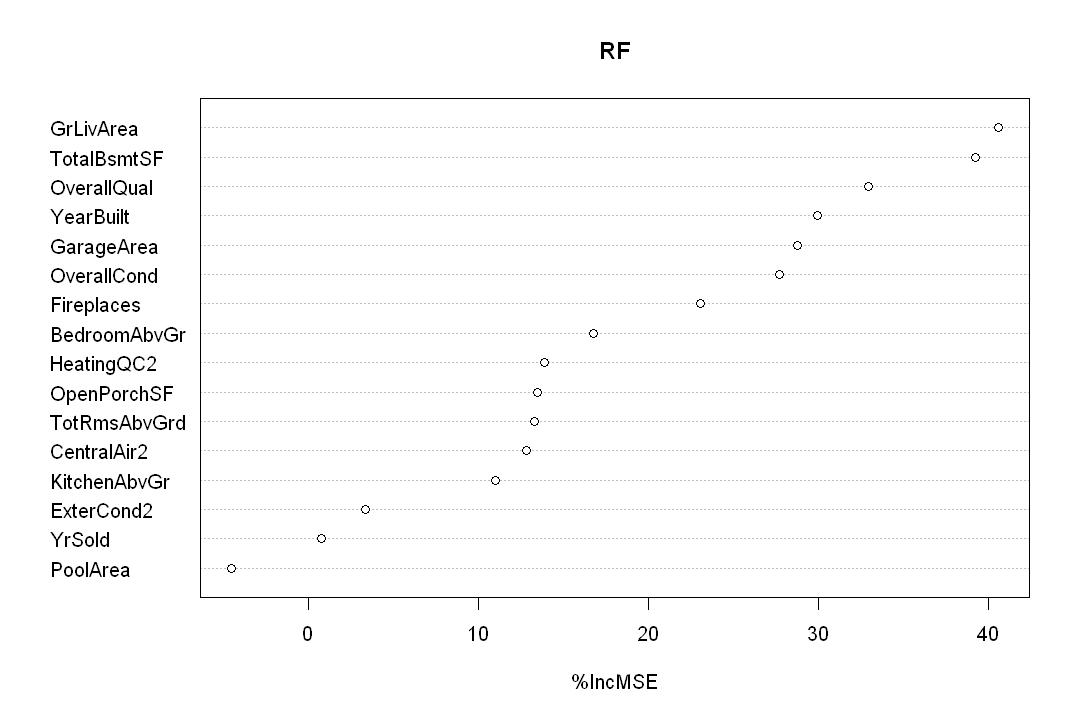

In [43]:
# variable importance plot from Random Forest

options(repr.plot.width=9, repr.plot.height=6)
varImpPlot(RF, type=1)

Figure above shows the variable importance plots generated from the random forest model for SalePrice. We see GrLivArea and TotalBsmtSF has the highest score. 

In [44]:
#prediction

rf.pred <- predict(RF, newdata=model_lin_valid )
accuracy(rf.pred, model_lin_valid$lSalePrice)

,ME,RMSE,MAE,MPE,MAPE
Test set,-0.0004281985,0.1384497,0.09486207,-0.02296528,0.7980985


As we can see from the results above, RMSE value is very small. 

RMSE values < 0.1 is very satisfactory.
RMSE value ≥0.5 reflects the poor ability of the model to accurately predict the data.

# *Graph below shows predicted vs actual Sale Price.* 

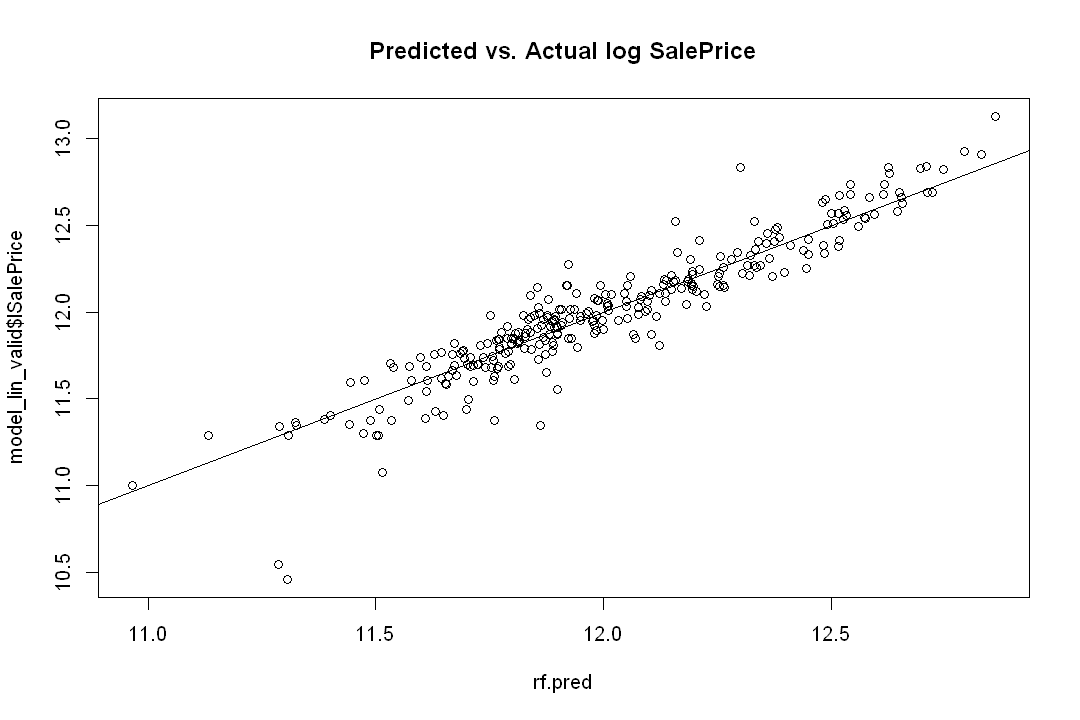

In [45]:
plot(rf.pred, model_lin_valid$lSalePrice, main = "Predicted vs. Actual log SalePrice") 
abline(0,1)

--------------------------------**Thank You**-------------------------------------------------